In [433]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# PREPARACIÓN DE LOS DATOS

In [435]:
# Cargo el CSV que armé en el otro notebook
df = pd.read_csv("Acciones.csv")

In [436]:
df.head()

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
0,MMM,7.929796e+10,Industrials,20.677778,18.845570,18.485226,1.99,1.079,0.16011,0.94760,316.755,1.720,-0.351,3.3391,0.07322,7.90
1,AOS,9.936618e+09,Industrials,19.752090,17.422606,5.382980,1.92,1.203,0.13683,0.27603,18.035,1.647,0.009,1.9303,0.13332,4.07
2,ABT,2.237782e+11,Healthcare,16.138018,24.926357,4.584566,1.84,0.732,0.32427,NaN,27.087,NaN,0.370,NaN,NaN,5.16
3,ABBV,3.467002e+11,Healthcare,83.521280,16.180956,244.123120,3.47,0.481,0.07313,0.88400,4789.603,0.760,-0.063,0.4136,0.08339,12.13
4,ACN,1.680520e+11,Technology,21.447536,19.176262,5.499032,2.16,1.293,0.11607,0.26928,25.881,1.461,0.147,2.1121,0.11245,14.07


In [437]:
df.shape

(517, 16)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticker            517 non-null    object 
 1   marketCap         516 non-null    float64
 2   sector            516 non-null    object 
 3   trailingPE        483 non-null    float64
 4   forwardPE         516 non-null    float64
 5   priceToBook       516 non-null    float64
 6   dividendYield     411 non-null    float64
 7   beta              499 non-null    float64
 8   profitMargins     516 non-null    float64
 9   returnOnEquity    477 non-null    float64
 10  debtToEquity      461 non-null    float64
 11  currentRatio      485 non-null    float64
 12  earningsGrowth    454 non-null    float64
 13  trailingPegRatio  420 non-null    float64
 14  returnOnAssets    504 non-null    float64
 15  epsForward        514 non-null    float64
dtypes: float64(14), object(2)
memory usage: 64.8

In [439]:
# Reviso si hay valores duplicados
df.duplicated().sum()

0

In [440]:
# Reviso si hay valores nulos
df.isnull().sum()

Ticker                0
marketCap             1
sector                1
trailingPE           34
forwardPE             1
priceToBook           1
dividendYield       106
beta                 18
profitMargins         1
returnOnEquity       40
debtToEquity         56
currentRatio         32
earningsGrowth       63
trailingPegRatio     97
returnOnAssets       13
epsForward            3
dtype: int64

In [441]:
# Ver porcentaje de valores nulos por columna
df.isnull().mean().sort_values(ascending=False) * 100 

dividendYield       20.502901
trailingPegRatio    18.762089
earningsGrowth      12.185687
debtToEquity        10.831721
returnOnEquity       7.736944
trailingPE           6.576402
currentRatio         6.189555
beta                 3.481625
returnOnAssets       2.514507
epsForward           0.580271
marketCap            0.193424
sector               0.193424
forwardPE            0.193424
priceToBook          0.193424
profitMargins        0.193424
Ticker               0.000000
dtype: float64

#### A) TRATAMIENTO DE VALORES NULOS POR VARIABLE

In [443]:
# dividendYield
df["dividendYield"] = df["dividendYield"].fillna(0)

In [444]:
# trailingPegRatio 
df["trailingPegRatio"].describe()

count    420.000000
mean       2.973686
std        4.733394
min        0.135600
25%        1.296575
50%        2.044400
75%        2.931500
max       53.072000
Name: trailingPegRatio, dtype: float64

<Axes: xlabel='trailingPegRatio', ylabel='Count'>

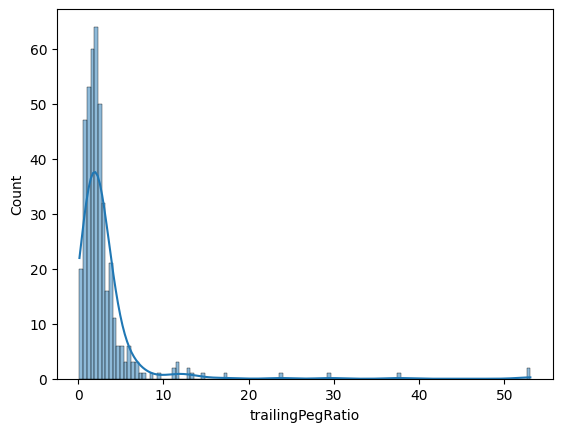

In [445]:
sns.histplot(df["trailingPegRatio"], kde=True)

In [446]:
mediana_peg = df["trailingPegRatio"].median()
df["trailingPegRatio"] = df["trailingPegRatio"].fillna(mediana_peg)

In [447]:
# earningsGrowth
df["earningsGrowth"].describe()

count    454.000000
mean       0.339412
std        3.215639
min       -0.985000
25%       -0.158000
50%        0.072500
75%        0.240750
max       64.000000
Name: earningsGrowth, dtype: float64

<Axes: xlabel='earningsGrowth', ylabel='Count'>

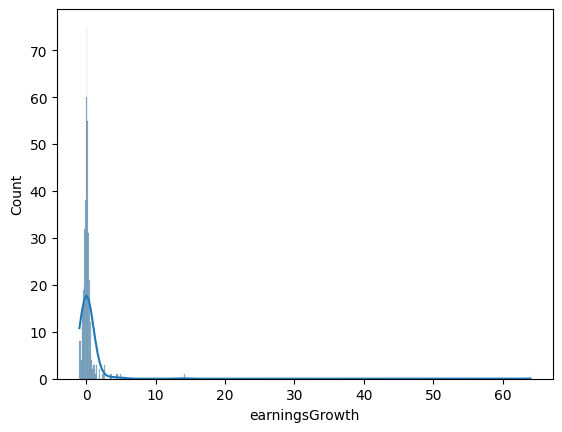

In [448]:
sns.histplot(df["earningsGrowth"], kde=True)

In [449]:
mediana_earnings = df["earningsGrowth"].median()
df["earningsGrowth"] = df["earningsGrowth"].fillna(mediana_earnings)

In [450]:
# debtToEquity
df["debtToEquity"].describe()

count     461.000000
mean      142.375527
std       293.337707
min         0.543000
25%        38.997000
50%        74.026000
75%       145.628000
max      4789.603000
Name: debtToEquity, dtype: float64

<Axes: xlabel='debtToEquity', ylabel='Count'>

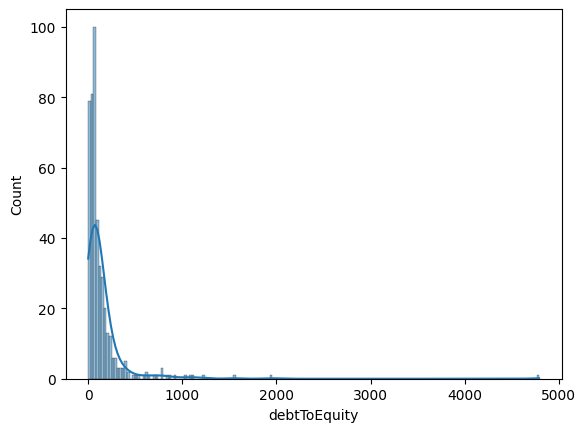

In [451]:
sns.histplot(df["debtToEquity"], kde=True)

In [452]:
mediana_debt = df["debtToEquity"].median()
df["debtToEquity"] = df["debtToEquity"].fillna(mediana_debt)

In [453]:
# returnOnEquity
df["returnOnEquity"].describe()

count    477.000000
mean       0.556234
std        6.265034
min       -1.832790
25%        0.088710
50%        0.151660
75%        0.294870
max      136.316830
Name: returnOnEquity, dtype: float64

<Axes: xlabel='returnOnEquity', ylabel='Count'>

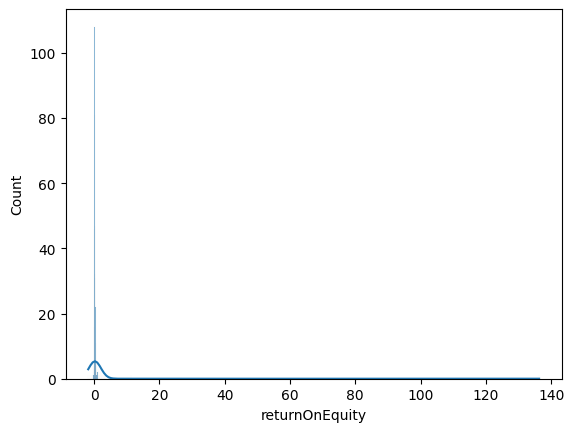

In [454]:
sns.histplot(df["returnOnEquity"], kde=True)

In [455]:
mediana_roe = df["returnOnEquity"].median()
df["returnOnEquity"] = df["returnOnEquity"].fillna(mediana_roe)

In [456]:
# trailingPE
df["trailingPE"].describe()

count     483.000000
mean       41.165700
std       120.501018
min         6.308252
25%        17.320684
50%        25.317688
75%        36.712339
max      2406.833500
Name: trailingPE, dtype: float64

<Axes: xlabel='trailingPE', ylabel='Count'>

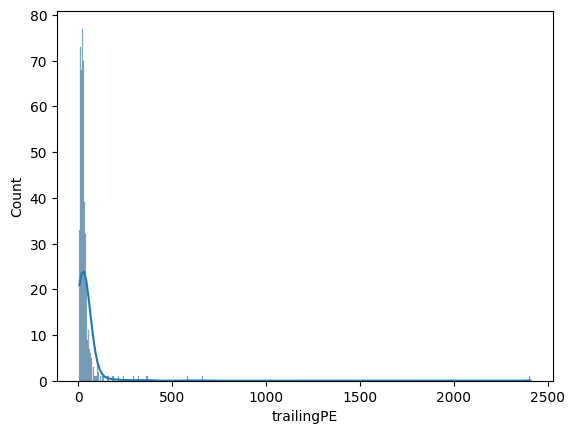

In [457]:
sns.histplot(df["trailingPE"], kde=True)

In [458]:
mediana_tpe = df["trailingPE"].median()
df["trailingPE"] = df["trailingPE"].fillna(mediana_tpe)

In [459]:
# currentRatio
df["currentRatio"].describe()

count    485.000000
mean       1.647412
std        1.588289
min        0.036000
25%        0.864000
50%        1.251000
75%        1.827000
max       21.505000
Name: currentRatio, dtype: float64

<Axes: xlabel='currentRatio', ylabel='Count'>

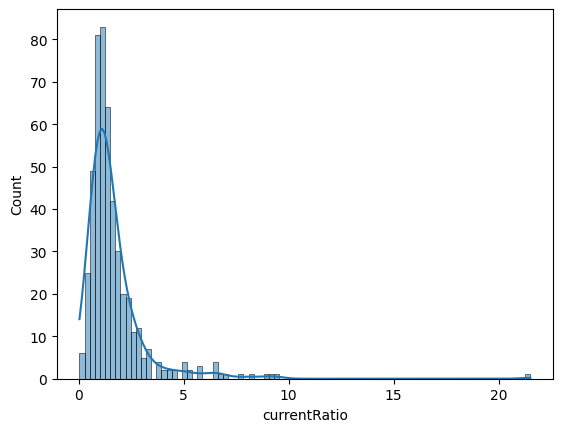

In [460]:
sns.histplot(df["currentRatio"], kde=True)

In [461]:
mediana_current = df["currentRatio"].median()
df["currentRatio"] = df["currentRatio"].fillna(mediana_current)

In [462]:
# beta
df["beta"].describe()

count    499.000000
mean       1.014976
std        0.456366
min        0.004000
25%        0.705500
50%        1.006000
75%        1.269000
max        3.714000
Name: beta, dtype: float64

<Axes: xlabel='beta', ylabel='Count'>

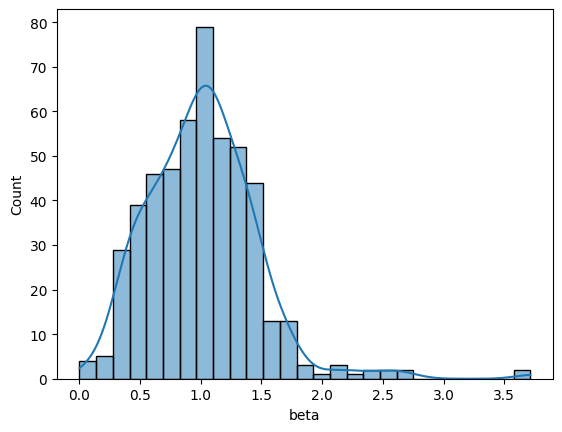

In [463]:
sns.histplot(df["beta"], kde=True)

In [464]:
media_beta = df["beta"].mean()
df["beta"] = df["beta"].fillna(media_beta)

In [465]:
# returnOnAssets
df["returnOnAssets"].describe()

count    504.000000
mean       0.067585
std        0.060332
min       -0.188250
25%        0.031093
50%        0.054120
75%        0.086227
max        0.532450
Name: returnOnAssets, dtype: float64

<Axes: xlabel='returnOnAssets', ylabel='Count'>

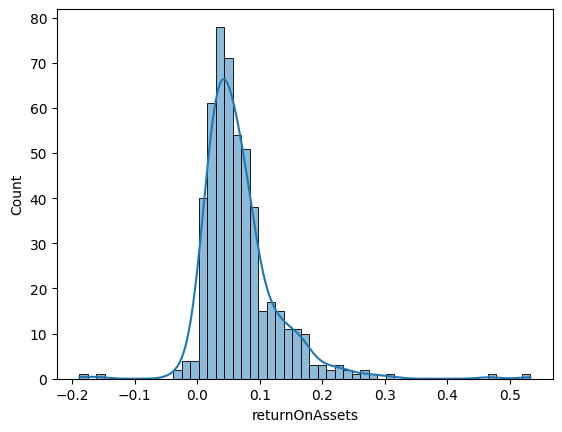

In [466]:
sns.histplot(df["returnOnAssets"], kde=True)

In [467]:
media_assets = df["returnOnAssets"].mean()
df["returnOnAssets"] = df["returnOnAssets"].fillna(media_assets)

In [468]:
# epsForward
df["epsForward"].describe()

count    514.000000
mean      10.878016
std       26.734934
min       -8.700000
25%        3.652500
50%        6.825000
75%       11.227500
max      518.050000
Name: epsForward, dtype: float64

<Axes: xlabel='epsForward', ylabel='Count'>

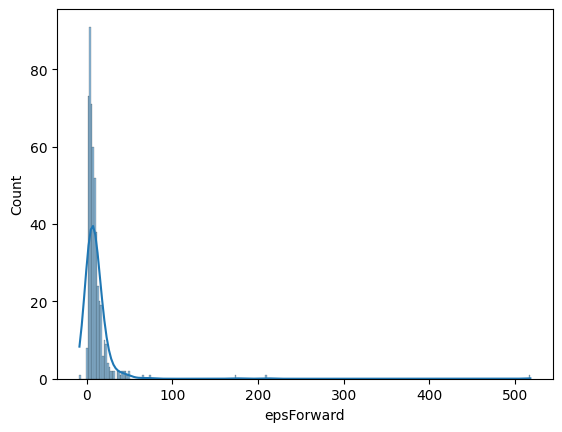

In [469]:
sns.histplot(df["epsForward"], kde=True)

In [470]:
mediana_eps = df["epsForward"].median()
df["epsForward"] = df["epsForward"].fillna(mediana_eps)

In [471]:
# marketCap
df["marketCap"].describe()

count    5.160000e+02
mean     1.191917e+11
std      3.699123e+11
min      4.257906e+09
25%      2.016941e+10
50%      4.004939e+10
75%      9.016278e+10
max      4.383428e+12
Name: marketCap, dtype: float64

<Axes: xlabel='marketCap', ylabel='Count'>

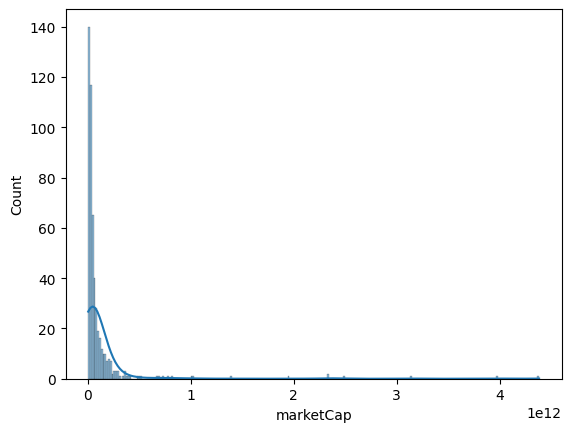

In [472]:
sns.histplot(df["marketCap"], kde=True)

In [473]:
# Dropeo un ticker que es una fila de valores nulos
df = df[df["Ticker"] != "BF.B"]

In [474]:
# Dropeo MTCH por tener -46,59 de P/B. Outlier que pasé por alto
df = df[df["Ticker"] != "MTCH"]

In [475]:
# Reviso si hay valores nulos
df.isnull().sum()

Ticker              0
marketCap           0
sector              0
trailingPE          0
forwardPE           0
priceToBook         0
dividendYield       0
beta                0
profitMargins       0
returnOnEquity      0
debtToEquity        0
currentRatio        0
earningsGrowth      0
trailingPegRatio    0
returnOnAssets      0
epsForward          0
dtype: int64

#### B) TRATAMIENTO DE VALORES EXTREMOS Y OUTLIERS

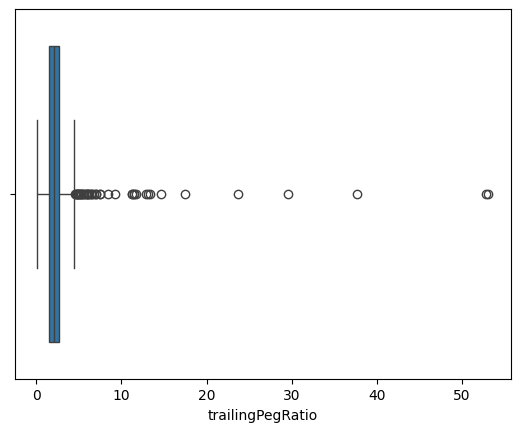

In [477]:
# trailingPegRatio
sns.boxplot(x=df["trailingPegRatio"])
plt.show()

In [478]:
Q1 = df["trailingPegRatio"].quantile(0.25)
Q3 = df["trailingPegRatio"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_peg = df[(df["trailingPegRatio"] < lim_inf) | (df["trailingPegRatio"] > lim_sup)]

In [479]:
print(outliers_peg[["Ticker", "trailingPegRatio"]])

    Ticker  trailingPegRatio
28     AMT           52.7919
54     BKR            6.1531
65     XYZ           23.7278
87    CARR           37.6380
110    CME            8.3927
114   COIN           14.6385
117    CAG           11.6651
128   COST            4.9275
130   CRWD            5.2781
147    DLR            5.4947
164     EW            4.8659
177    ESS            6.9975
187    XOM            5.8372
202   FOXA            6.0712
203    FOX            5.5796
208     GE            6.4264
214    GIS           11.2971
222    HAL           11.4241
228    HSY           53.0720
229    HPE           11.4906
244   IDXX            4.7240
248   PODD            7.5319
257   INVH           12.9175
262   JKHY            4.6846
272    KMB            5.5041
289    LYV            5.2304
296    MTB           29.5419
321    TAP            6.7460
322   MDLZ            5.3007
337    NKE            4.5787
341   NTRS            7.5027
359   PLTR            4.8907
379    PGR            5.1285
384    PSA    

In [480]:
outliers_peg["trailingPegRatio"].describe()

count    46.000000
mean     11.087241
std      11.183496
min       4.578700
25%       5.349200
50%       6.468200
75%      11.473975
max      53.072000
Name: trailingPegRatio, dtype: float64

In [481]:
print(outliers_peg["Ticker"][outliers_peg["trailingPegRatio"] > 50])

28     AMT
228    HSY
Name: Ticker, dtype: object


In [482]:
df = df[df["trailingPegRatio"] < 25]

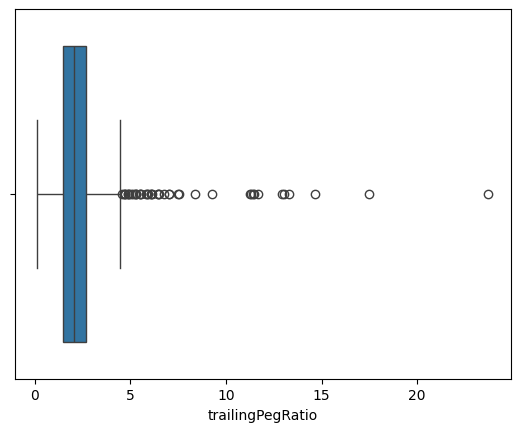

In [483]:
sns.boxplot(x=df["trailingPegRatio"])
plt.show()

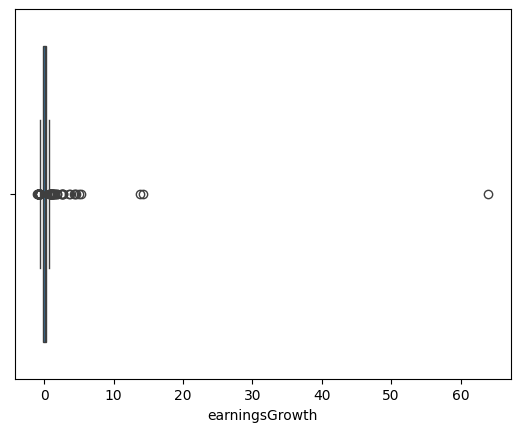

In [484]:
# earningsGrowth
sns.boxplot(x=df["earningsGrowth"])
plt.savefig("Outliers.png", dpi=300, bbox_inches="tight")
plt.show()

In [485]:
Q1 = df["earningsGrowth"].quantile(0.25)
Q3 = df["earningsGrowth"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_earnings = df[(df["earningsGrowth"] < lim_inf) | (df["earningsGrowth"] > lim_sup)]

In [486]:
print(outliers_earnings[["Ticker", "earningsGrowth"]])

    Ticker  earningsGrowth
6      AMD           5.252
7      AES          -0.892
8      AFL          -0.985
25     AEP           2.578
33     APH           1.098
..     ...             ...
426   SMCI          -0.741
450    TRV           1.852
454    TSN          -0.952
457    UDR           0.792
503    APP           1.481

[62 rows x 2 columns]


In [487]:
outliers_earnings["earningsGrowth"].describe()

count    62.000000
mean      2.293000
std       8.474262
min      -0.985000
25%      -0.771000
50%       0.893000
75%       1.873750
max      64.000000
Name: earningsGrowth, dtype: float64

In [488]:
df = df[df["earningsGrowth"] < 5]

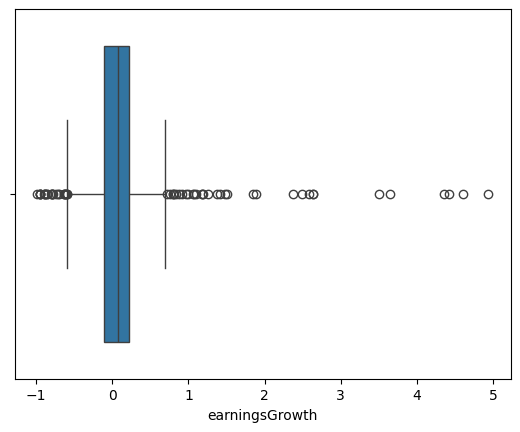

In [489]:
sns.boxplot(x=df["earningsGrowth"])
plt.show()

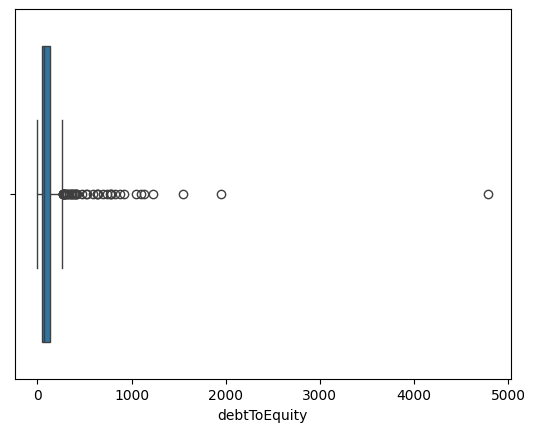

In [490]:
# debtToEquity 
sns.boxplot(x=df["debtToEquity"])
plt.show()

In [491]:
Q1 = df["debtToEquity"].quantile(0.25)
Q3 = df["debtToEquity"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_debt = df[(df["debtToEquity"] < lim_inf) | (df["debtToEquity"] > lim_sup)]

In [492]:
print(outliers_debt[["Ticker", "debtToEquity"]])

    Ticker  debtToEquity
0      MMM       316.755
3     ABBV      4789.603
7      AES       361.561
32    AMGN       924.456
70     BMY       293.850
80     CZR       632.192
85     KMX       309.961
86     CCL       286.330
91     CDW       272.795
92     COR       827.730
98    CHTR       472.717
109    CLX      1549.474
115     CL      1128.104
136    DRI       338.057
138    DVA       742.203
141     DE       275.281
184   EXPE       278.630
199      F       353.298
211    GEN       366.461
220   GDDY      1945.769
221     GS       532.258
224    HAS      1231.331
232     HD       778.781
245    ITW       278.325
258    IQV       272.122
272    KMB       595.098
283    LVS       693.252
289    LYV       393.218
291    LMT       405.662
303     MA       280.795
313    MGM       880.101
326     MS       416.642
328    MSI       393.309
331   NTAP       335.673
343   NCLH      1045.053
344    NRG       395.715
355   ORCL       519.586
367    PEP       276.868
411    SHW       308.571


In [493]:
outliers_earnings["debtToEquity"].describe()

count     62.000000
mean     114.097758
std      145.163618
min        4.432000
25%       34.966500
50%       69.730500
75%      124.276500
max      827.730000
Name: debtToEquity, dtype: float64

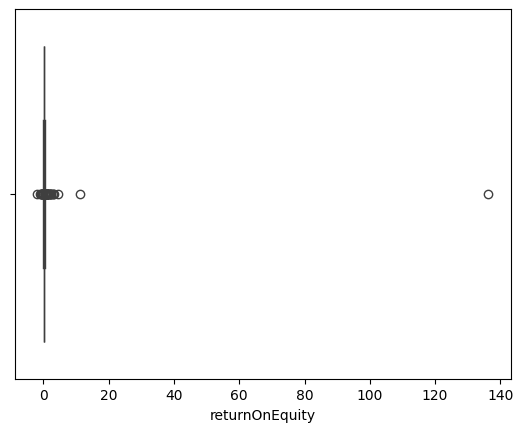

In [494]:
# returnOnEquity 
sns.boxplot(x=df["returnOnEquity"])
plt.show()

In [495]:
Q1 = df["returnOnEquity"].quantile(0.25)
Q3 = df["returnOnEquity"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_roe = df[(df["returnOnEquity"] < lim_inf) | (df["returnOnEquity"] > lim_sup)]

In [496]:
print(outliers_roe[["Ticker", "returnOnEquity"]])

    Ticker  returnOnEquity
0      MMM        0.947600
3     ABBV        0.884000
30     AMP        0.582390
32    AMGN        1.056730
38    AAPL        1.380150
49     ADP        0.760030
88     CAT        0.556460
92     COR        1.417800
109    CLX        3.186520
115     CL        4.512590
131    CCI       -1.832790
200   FTNT        2.059060
207     IT        1.131850
220   GDDY        2.456960
224    HAS       -0.774160
225    HCA      136.316830
232     HD        2.995190
244   IDXX        0.593300
245    ITW        1.090230
249   INTC       -0.186160
272    KMB        2.070600
276   KLAC        1.040970
286    LII        1.129440
287    LLY        0.772780
289    LYV        0.685060
291    LMT        0.730560
302    MAS       11.165561
303     MA        1.877040
318   MRNA       -0.293410
323   MPWR        0.679460
328    MSI        1.868850
331   NTAP        1.085090
343   NCLH        0.958730
346   NVDA        1.154630
355   ORCL        0.823820
361   PARA       -0.277550
4

In [497]:
outliers_roe["returnOnEquity"].describe()

count     50.000000
mean       3.821924
std       19.209048
min       -1.832790
25%        0.582405
50%        0.853910
75%        1.408387
max      136.316830
Name: returnOnEquity, dtype: float64

In [498]:
df = df[df["returnOnEquity"] < 10]

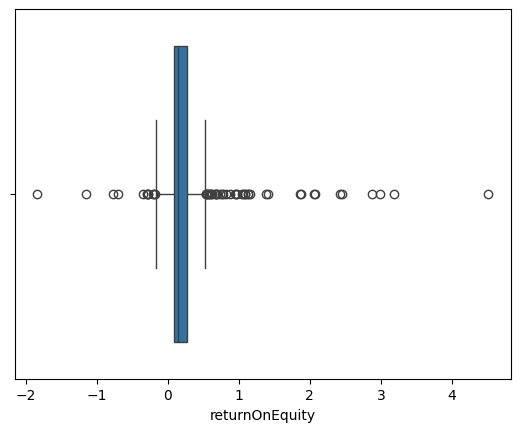

In [499]:
sns.boxplot(x=df["returnOnEquity"])
plt.show()

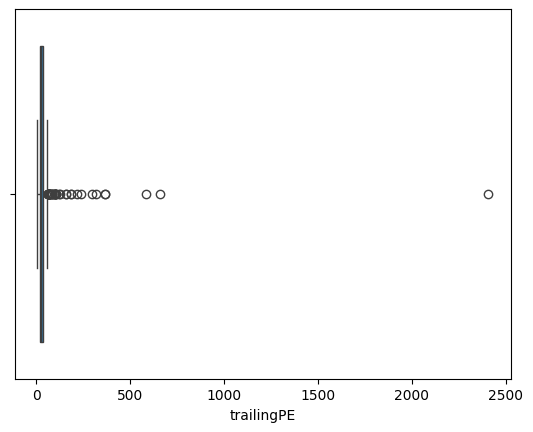

In [500]:
# trailingPE
sns.boxplot(x=df["trailingPE"])
plt.show()

In [501]:
Q1 = df["trailingPE"].quantile(0.25)
Q3 = df["trailingPE"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_tpe = df[(df["trailingPE"] < lim_inf) | (df["trailingPE"] > lim_sup)]

In [502]:
print(outliers_tpe[["Ticker", "trailingPE"]])

    Ticker   trailingPE
3     ABBV    83.521280
34     ADI    61.419617
48    ADSK    66.120430
53    AXON   183.799760
61    TECH    68.421690
69     BSX    62.952385
71    AVGO   107.396360
79    CDNS    99.153630
81     CPT   101.513760
83     COF   582.162100
114   COIN    71.979320
124    GLW    67.053190
127   CSGP   367.730770
137   DDOG   295.291700
139    DAY   365.187500
152   DASH   317.708860
158     DD  2406.833500
174   EQIX    82.995290
210    GEV   160.903150
226    DOC    70.666664
254   INTU    64.512634
255   ISRG    68.236730
259    IRM   238.634140
275    KKR    63.150860
287    LLY    62.097477
359   PLTR   660.333300
360   PANW   101.023680
386    PWR    64.725460
410    NOW   119.804924
428   SNPS    73.926020
439   TSLA   184.147920
445    TKO    85.923470
446    TTD   107.112800
453    TYL    82.261810
457    UDR   101.948715
466    VTR   156.441850
488   WELL    92.166400
491     WY    66.513160
495   WDAY   128.640880
503    APP    70.524460
504    ARM   217

In [503]:
outliers_tpe["trailingPE"].describe()

count      42.000000
mean      203.196370
std       373.560988
min        61.419617
25%        68.947383
50%       100.088655
75%       178.075607
max      2406.833500
Name: trailingPE, dtype: float64

In [504]:
df = df[df["trailingPE"] < 700]

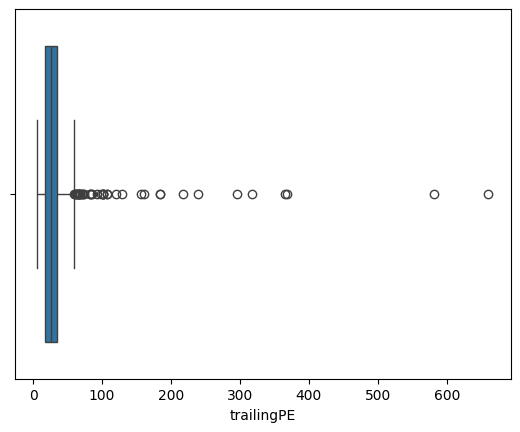

In [505]:
sns.boxplot(x=df["trailingPE"])
plt.show()

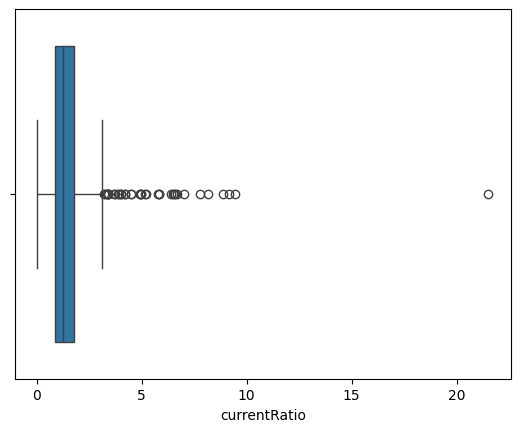

In [506]:
# currentRatio
sns.boxplot(x=df["currentRatio"])
plt.show()

In [507]:
Q1 = df["currentRatio"].quantile(0.25)
Q3 = df["currentRatio"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_current = df[(df["currentRatio"] < lim_inf) | (df["currentRatio"] > lim_sup)]

In [508]:
print(outliers_current[["Ticker", "currentRatio"]])

    Ticker  currentRatio
30     AMP         9.169
43    ANET         3.933
61    TECH         3.707
123   CPRT         8.155
127   CSGP         5.834
155    DHI         6.526
186    EXR         4.016
191   FAST         4.220
204    BEN         6.576
226    DOC         4.007
231   HOLX         3.242
248   PODD         4.474
255   ISRG         5.167
271   KEYS         3.387
285    LEN         9.429
298   MKTX         8.864
318   MRNA         4.218
323   MPWR         4.921
324   MNST         3.375
346   NVDA         3.388
347    NVR         5.788
353     ON         4.949
359   PLTR         6.494
385    PHM         6.409
394   REGN         4.927
397    RMD         3.411
398   RVTY         3.329
413   SWKS         4.950
416    SNA         4.482
426   SMCI         6.662
428   SNPS         7.015
431   TROW         3.886
440    TXN         5.812
441    TPL         7.795
473   VICI        21.505
488   WELL         3.221
504    ARM         5.199
514   SHOP         3.706


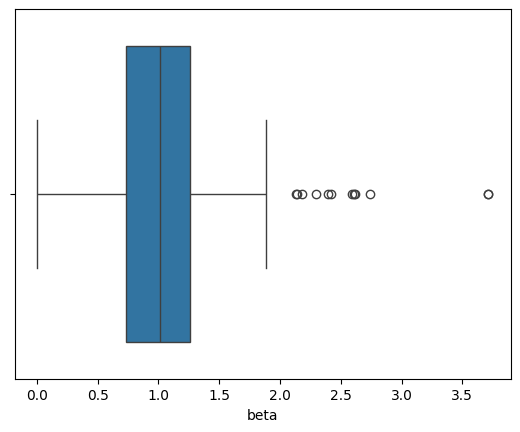

In [509]:
# beta
sns.boxplot(x=df["beta"])
plt.show()

In [510]:
Q1 = df["beta"].quantile(0.25)
Q3 = df["beta"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_beta = df[(df["beta"] < lim_inf) | (df["beta"] > lim_sup)]

In [511]:
print(outliers_beta[["Ticker", "beta"]])

    Ticker   beta
65     XYZ  2.742
80     CZR  2.298
86     CCL  2.609
114   COIN  3.712
343   NCLH  2.140
346   NVDA  2.131
359   PLTR  2.593
403    RCL  2.177
439   TSLA  2.398
503    APP  2.423
512   MSTR  3.714
514   SHOP  2.615


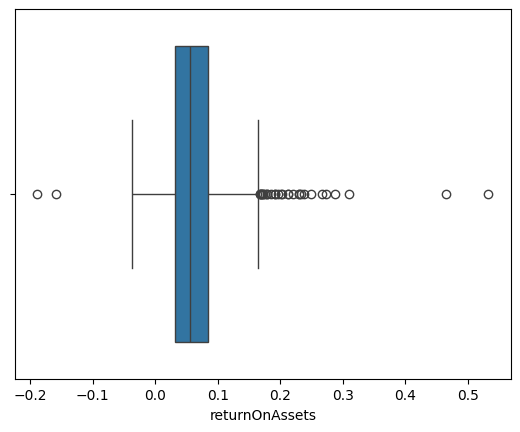

In [512]:
# returnOnAssets
sns.boxplot(x=df["returnOnAssets"])
plt.show()

In [513]:
Q1 = df["returnOnAssets"].quantile(0.25)
Q3 = df["returnOnAssets"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_roa = df[(df["returnOnAssets"] < lim_inf) | (df["returnOnAssets"] > lim_sup)]

In [514]:
print(outliers_roa[["Ticker", "returnOnAssets"]])

    Ticker  returnOnAssets
5     ADBE         0.17851
19   GOOGL         0.16792
20    GOOG         0.16792
21      MO         0.22988
38    AAPL         0.23810
68    BKNG         0.17569
140   DECK         0.21270
151    DPZ         0.30974
190   FICO         0.28703
191   FAST         0.20309
244   IDXX         0.22982
276   KLAC         0.19229
281   LRCX         0.17291
286    LII         0.19141
294   LULU         0.22018
303     MA         0.23363
310   META         0.17880
312    MTD         0.21217
318   MRNA        -0.15837
329   MSCI         0.18545
346   NVDA         0.53245
347    NVR         0.20126
441    TPL         0.26720
458   ULTA         0.16846
468   VRSN         0.46560
469   VRSK         0.17256
474      V         0.16971
478    GWW         0.19602
492    WSM         0.17055
499    YUM         0.24858
503    APP         0.27268
512   MSTR        -0.18825


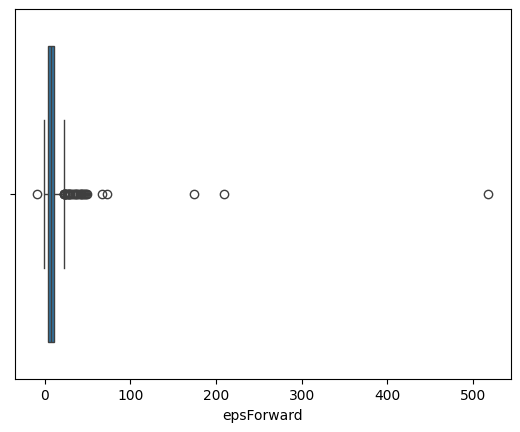

In [515]:
# epsForward 
sns.boxplot(x=df["epsForward"])
plt.show()

In [516]:
Q1 = df["epsForward"].quantile(0.25)
Q3 = df["epsForward"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_eps = df[(df["epsForward"] < lim_inf) | (df["epsForward"] > lim_sup)]

In [517]:
print(outliers_eps[["Ticker", "epsForward"]])

    Ticker  epsForward
30     AMP       38.63
50     AZO      174.32
63     BLK       49.10
68    BKNG      209.85
98    CHTR       35.78
101     CB       23.61
103     CI       31.32
166    ELV       34.95
179     EG       66.47
190   FICO       37.17
193    FDX       22.75
221     GS       41.56
276   KLAC       32.82
286    LII       23.36
287    LLY       22.66
291    LMT       28.11
307    MCK       36.81
310   META       25.30
312    MTD       42.60
318   MRNA       -8.70
320    MOH       25.71
332   NFLX       23.78
342    NOC       28.06
347    NVR      518.05
349   ORLY       44.94
362     PH       29.44
394   REGN       45.31
441    TPL       73.12
443    TMO       23.49
449    TDG       43.48
458   ULTA       22.87
462    URI       46.86
463    UNH       29.90
478    GWW       42.11
505   ASML       26.70
511   MELI       48.38


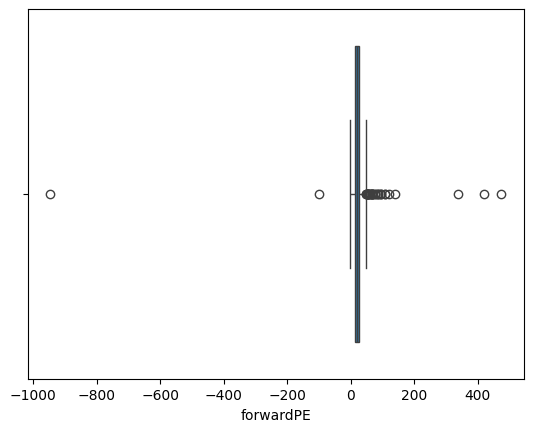

In [518]:
# forwardPE
sns.boxplot(x=df["forwardPE"])
plt.show()

In [519]:
Q1 = df["forwardPE"].quantile(0.25)
Q3 = df["forwardPE"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_fpe = df[(df["forwardPE"] < lim_inf) | (df["forwardPE"] > lim_sup)]

In [520]:
print(outliers_fpe[["Ticker", "forwardPE"]])

    Ticker   forwardPE
33     APH   49.946760
53    AXON  122.137910
67      BA  473.893620
79    CDNS   53.702187
81     CPT   68.302470
114   COIN  107.263306
127   CSGP   85.366070
130   CRWD  107.644035
137   DDOG   69.822660
152   DASH  141.005630
174   EQIX   59.300076
208     GE   51.683210
210    GEV   96.308700
226    DOC   67.840000
236    HWM   54.570980
248   PODD   75.634290
255   ISRG   62.159668
259    IRM   49.918365
267      K   66.565500
289    LYV   61.702480
332   NFLX   49.426407
359   PLTR  337.191470
400    ROL   51.303570
410    NOW   56.817660
439   TSLA   96.052470
445    TKO   51.978397
453    TYL   53.094185
457    UDR   84.595740
466    VTR  420.437500
483    WBD -100.550000
488   WELL   91.153570
503    APP   75.444770
504    ARM   68.713590
511   MELI   48.820377
512   MSTR -947.116300
514   SHOP   67.510810
515    TRI   50.044773
516     ZS   81.779495


In [521]:
df = df[df["forwardPE"] < 400]
df = df[df["forwardPE"] > 0]

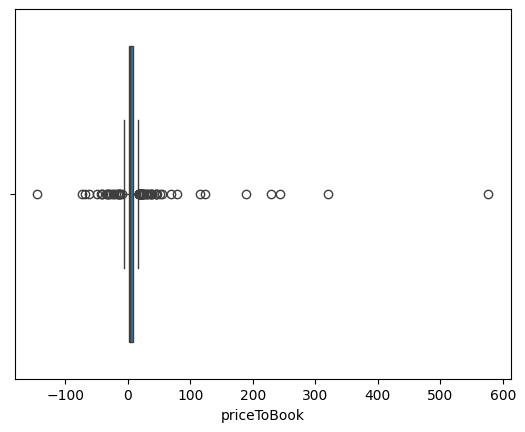

In [522]:
# priceToBook
sns.boxplot(x=df["priceToBook"])
plt.show()

In [523]:
Q1 = df["priceToBook"].quantile(0.25)
Q3 = df["priceToBook"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_pb = df[(df["priceToBook"] < lim_inf) | (df["priceToBook"] > lim_sup)]

In [524]:
print(outliers_pb[["Ticker", "priceToBook"]])

    Ticker  priceToBook
0      MMM    18.485226
3     ABBV   244.123120
21      MO   -32.115883
32    AMGN    26.119404
38    AAPL    46.850815
..     ...          ...
503    APP   228.862440
504    ARM    21.867758
507   TEAM    37.408688
511   MELI    23.929667
516     ZS    25.112999

[77 rows x 2 columns]


In [525]:
outliers_pb["priceToBook"].describe()

count     77.000000
mean      29.639501
std       92.100152
min     -144.307920
25%      -13.794114
50%       20.378730
75%       35.520477
max      577.009160
Name: priceToBook, dtype: float64

In [526]:
print(outliers_pb[["Ticker", "priceToBook"]][outliers_pb["priceToBook"] < -70])

    Ticker  priceToBook
312    MTD   -144.30792
408    STX    -73.62012


In [527]:
print(outliers_pb[["Ticker", "priceToBook"]][outliers_pb["priceToBook"] > 200])

    Ticker  priceToBook
3     ABBV    244.12312
109    CLX    577.00916
289    LYV    321.11830
503    APP    228.86244


In [528]:
df = df[df["priceToBook"] < 200]

In [529]:
df = df[df["priceToBook"] > -70]

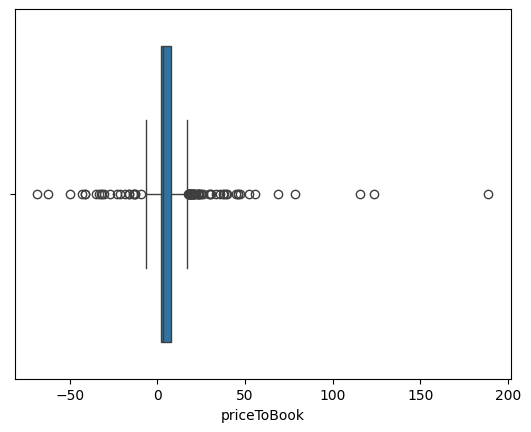

In [530]:
sns.boxplot(x=df["priceToBook"])
plt.show()

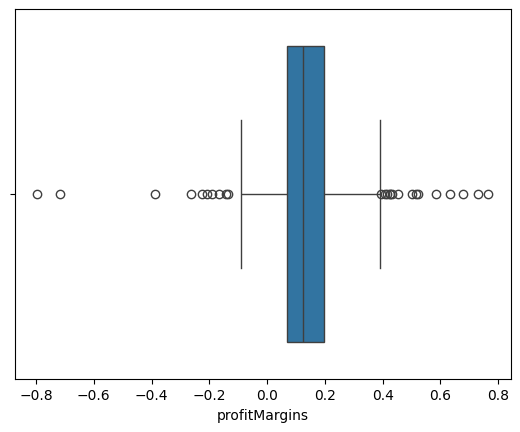

In [531]:
# profitMargins
sns.boxplot(x=df["profitMargins"])
plt.show()

In [532]:
Q1 = df["profitMargins"].quantile(0.25)
Q3 = df["profitMargins"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_profit = df[(df["profitMargins"] < lim_inf) | (df["profitMargins"] > lim_sup)]

In [533]:
print(outliers_profit[["Ticker", "profitMargins"]])

    Ticker  profitMargins
13     ALB       -0.22391
21      MO        0.43373
43    ANET        0.40720
110    CME        0.58587
131    CCI       -0.71707
149   DLTR       -0.16548
164     EW        0.72956
177    ESS        0.42403
224    HAS       -0.13369
249   INTC       -0.38636
277    KHC       -0.20826
303     MA        0.45213
323   MPWR        0.76587
329   MSCI        0.39464
346   NVDA        0.51694
361   PARA       -0.19095
384    PSA        0.41589
414    SJM       -0.14105
432   TTWO       -0.79503
441    TPL        0.63243
451   TRMB        0.42399
468   VRSN        0.50025
472   VTRS       -0.26448
473   VICI        0.67812
474      V        0.52158


In [534]:
outliers_pb["profitMargins"].describe()

count    77.000000
mean      0.156051
std       0.208620
min      -0.795030
25%       0.071750
50%       0.160110
75%       0.227620
max       0.632430
Name: profitMargins, dtype: float64

In [535]:
df.shape

(493, 16)

#### C) CREACIÓN DE COPIA ESTANDARIZADA DEL DATAFRAME

In [537]:
df1 = df.drop(columns=["Ticker", "sector"])
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

In [538]:
df_std.head()

,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
0,-0.110170,-0.276466,-0.231443,0.748435,0.073031,0.179418,0.155370,1.798602,1.089921,0.053258,-0.727104,0.376052,0.088941,-0.116022
1,-0.293910,-0.294063,-0.296912,-0.045487,0.032150,0.470224,-0.016112,0.106280,-0.591657,0.006642,-0.174415,-0.262602,1.145655,-0.256968
2,0.272563,-0.362766,0.048329,-0.093867,-0.014571,-0.634371,1.364581,-0.207126,-0.540701,-0.246231,0.379808,-0.210877,-0.010140,-0.216855
3,0.124943,-0.261833,-0.216228,-0.038455,0.172314,0.681293,-0.169032,0.089270,-0.547490,-0.112132,0.037448,-0.180187,0.778706,0.111037
4,0.080902,-0.235108,-0.299295,0.435137,-1.089158,1.187859,1.214682,0.727472,-0.369577,-0.410982,0.009814,-0.603236,1.940212,0.349505


# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [540]:
df.describe()

,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
count,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,1.208866e+11,35.221173,23.875943,6.133669,1.864949,1.002496,0.139017,0.233855,123.138613,1.636598,0.122608,2.509571,0.068162,11.052718
std,3.778797e+11,52.658060,21.756946,16.519943,1.714025,0.426834,0.135896,0.397237,177.823101,1.567591,0.652023,2.208128,0.056932,27.201145
min,4.257906e+09,6.308252,2.203605,-68.390884,0.000000,0.004000,-0.795030,-1.832790,0.543000,0.036000,-0.985000,0.135600,-0.026360,0.250000
25%,1.994839e+10,17.875246,13.168289,1.817467,0.500000,0.727000,0.069010,0.092740,45.034000,0.899000,-0.133000,1.510800,0.031600,3.720000
50%,4.046892e+10,25.317688,20.105265,3.331173,1.450000,1.014976,0.124970,0.151660,74.026000,1.251000,0.072500,2.044400,0.056160,6.900000
75%,8.986893e+10,34.607254,26.886467,7.850637,2.950000,1.246000,0.198160,0.269280,135.497000,1.791000,0.216000,2.713100,0.084620,11.270000
max,4.383428e+12,660.333300,337.191470,188.705350,9.310000,3.712000,0.765870,4.512590,1945.769000,21.505000,4.939000,23.727800,0.532450,518.050000


#### A) Distribuciones

MARKET CAP

In [543]:
top10 = df.sort_values("marketCap", ascending=False).head(10)
bottom10 = df.sort_values("marketCap", ascending=True).head(10)
top10

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
346,NVDA,4.383428e+12,Technology,57.980648,43.626217,52.280400,0.02,2.131,0.51694,1.15463,12.267,3.388,0.267,1.7381,0.53245,4.12
316,MSFT,3.973659e+12,Technology,39.167034,35.761204,12.347114,0.65,1.033,0.35789,0.33610,32.626,1.372,0.177,2.3937,0.14582,14.95
38,AAPL,3.128602e+12,Technology,32.627728,25.206978,46.850815,0.50,1.199,0.24301,1.38015,146.994,0.821,0.078,1.9492,0.23810,8.31
22,AMZN,2.496022e+12,Consumer Cyclical,38.229267,38.229267,8.157877,0.00,1.337,0.10140,0.25240,51.641,1.048,0.622,2.7624,0.07632,6.15
20,GOOG,2.336603e+12,Communication Services,20.649809,21.641922,6.460168,0.43,1.005,0.31118,0.34829,11.481,1.904,0.223,1.4676,0.16792,8.95
19,GOOGL,2.335108e+12,Communication Services,20.563500,21.504463,6.426308,0.43,1.005,0.31118,0.34829,11.481,1.904,0.223,1.4609,0.16792,8.96
310,META,1.954351e+12,Communication Services,28.234106,30.722727,10.784391,0.30,1.284,0.39114,0.39835,26.763,2.662,0.365,2.2967,0.17880,25.30
71,AVGO,1.389123e+12,Technology,107.396360,47.867096,4.987082,0.78,1.138,0.22643,0.18977,166.032,1.077,1.881,1.4193,0.08014,6.17
59,BRK.B,1.026650e+12,Financial Services,12.685818,23.697460,0.001046,0.00,0.818,0.21788,0.13187,19.175,2.716,-0.637,2.0444,0.05789,20.08
439,TSLA,1.003792e+12,Consumer Cyclical,184.147920,96.052470,12.977356,0.00,2.398,0.06344,0.08177,16.823,2.037,-0.175,5.8558,0.02911,3.24


In [544]:
top10.describe()

,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.402734e+12,54.168219,38.430980,16.127256,0.311000,1.334800,0.274049,0.462162,49.528300,1.892900,0.302400,2.338810,0.167447,10.623000
std,1.155402e+12,53.053118,22.269019,18.070770,0.293237,0.516375,0.134595,0.439709,57.884601,0.838332,0.648791,1.313519,0.143714,7.235109
min,1.003792e+12,12.685818,21.504463,0.001046,0.000000,0.818000,0.063440,0.081770,11.481000,0.821000,-0.637000,1.419300,0.029110,3.240000
25%,1.530430e+12,22.545883,24.074839,6.434773,0.005000,1.012000,0.220017,0.205427,13.406000,1.150750,0.102750,1.535225,0.077275,6.155000
50%,2.335856e+12,35.428497,33.241965,9.471134,0.365000,1.168500,0.277095,0.342195,22.969000,1.904000,0.223000,1.996800,0.156870,8.630000
75%,2.970457e+12,53.277245,42.276979,12.819795,0.482500,1.323750,0.346212,0.385835,46.887250,2.505750,0.340500,2.369450,0.176080,13.452500
max,4.383428e+12,184.147920,96.052470,52.280400,0.780000,2.398000,0.516940,1.380150,166.032000,3.388000,1.881000,5.855800,0.532450,25.300000


In [545]:
bottom10

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
168,ENPH,4.257906e+09,Technology,25.244186,8.897540,4.834471,0.00,1.666,0.11782,0.19795,140.210,1.969,2.4890,0.5524,0.03744,3.66
80,CZR,5.611624e+09,Consumer Cyclical,25.317688,20.134327,1.440393,0.00,2.298,-0.01714,-0.03018,632.192,0.824,0.0725,2.0444,0.04189,1.34
36,APA,6.973330e+09,Energy,6.926524,7.027273,1.284907,5.13,1.250,0.10041,0.26176,84.961,0.885,1.1810,2.0444,0.08232,2.75
319,MHK,7.156663e+09,Consumer Cyclical,15.296812,10.330493,0.864013,0.00,1.186,0.04439,0.05947,31.685,2.126,-0.0490,2.0444,0.03402,11.15
290,LKQ,7.639029e+09,Consumer Cyclical,10.835767,8.201658,1.172035,3.98,0.941,0.05041,0.11208,90.494,1.814,0.0670,0.9344,0.05031,3.62
298,MKTX,7.757602e+09,Financial Services,35.913193,25.134874,5.768544,1.45,0.844,0.26569,0.16254,5.259,8.864,-0.7920,2.8765,0.11063,8.23
282,LW,7.942943e+09,Consumer Defensive,22.808000,11.449800,4.568911,2.52,0.448,0.05537,0.20264,244.818,1.377,-0.0490,2.6321,0.07246,4.98
13,ALB,8.059779e+09,Basic Materials,25.317688,37.228260,1.042253,2.35,1.630,-0.22391,-0.09992,35.757,2.112,0.0725,2.0444,-0.01509,1.84
192,FRT,8.064903e+09,Real Estate,26.678450,30.241370,2.641130,4.70,1.107,0.24701,0.09447,133.513,0.371,0.0920,3.6481,0.03170,3.07
159,EMN,8.415879e+09,Basic Materials,9.285351,8.378161,1.432840,4.52,1.235,0.09848,0.16032,86.003,1.719,0.1300,1.9423,0.05952,8.70


In [546]:
bottom10 = df.sort_values("marketCap", ascending=True).head(10)

In [547]:
bottom10

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
168,ENPH,4.257906e+09,Technology,25.244186,8.897540,4.834471,0.00,1.666,0.11782,0.19795,140.210,1.969,2.4890,0.5524,0.03744,3.66
80,CZR,5.611624e+09,Consumer Cyclical,25.317688,20.134327,1.440393,0.00,2.298,-0.01714,-0.03018,632.192,0.824,0.0725,2.0444,0.04189,1.34
36,APA,6.973330e+09,Energy,6.926524,7.027273,1.284907,5.13,1.250,0.10041,0.26176,84.961,0.885,1.1810,2.0444,0.08232,2.75
319,MHK,7.156663e+09,Consumer Cyclical,15.296812,10.330493,0.864013,0.00,1.186,0.04439,0.05947,31.685,2.126,-0.0490,2.0444,0.03402,11.15
290,LKQ,7.639029e+09,Consumer Cyclical,10.835767,8.201658,1.172035,3.98,0.941,0.05041,0.11208,90.494,1.814,0.0670,0.9344,0.05031,3.62
298,MKTX,7.757602e+09,Financial Services,35.913193,25.134874,5.768544,1.45,0.844,0.26569,0.16254,5.259,8.864,-0.7920,2.8765,0.11063,8.23
282,LW,7.942943e+09,Consumer Defensive,22.808000,11.449800,4.568911,2.52,0.448,0.05537,0.20264,244.818,1.377,-0.0490,2.6321,0.07246,4.98
13,ALB,8.059779e+09,Basic Materials,25.317688,37.228260,1.042253,2.35,1.630,-0.22391,-0.09992,35.757,2.112,0.0725,2.0444,-0.01509,1.84
192,FRT,8.064903e+09,Real Estate,26.678450,30.241370,2.641130,4.70,1.107,0.24701,0.09447,133.513,0.371,0.0920,3.6481,0.03170,3.07
159,EMN,8.415879e+09,Basic Materials,9.285351,8.378161,1.432840,4.52,1.235,0.09848,0.16032,86.003,1.719,0.1300,1.9423,0.05952,8.70


In [548]:
bottom10.describe()

,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.187966e+09,20.362366,16.702376,2.504950,2.465000,1.260500,0.073853,0.112113,148.489200,2.206100,0.321400,2.076340,0.050520,4.934000
std,1.301791e+09,9.311181,10.810334,1.848008,2.051851,0.510223,0.136923,0.111112,183.094065,2.415244,0.896247,0.886192,0.033934,3.295971
min,4.257906e+09,6.926524,7.027273,0.864013,0.000000,0.448000,-0.223910,-0.099920,5.259000,0.371000,-0.792000,0.552400,-0.015090,1.340000
25%,7.019163e+09,11.951028,8.508006,1.200253,0.362500,0.982500,0.045895,0.068220,48.058000,1.008000,-0.020000,1.967825,0.034875,2.830000
50%,7.698316e+09,24.026093,10.890147,1.436616,2.435000,1.210500,0.076925,0.136200,88.248500,1.766500,0.072500,2.044400,0.046100,3.640000
75%,8.030570e+09,25.317688,23.884737,4.086965,4.385000,1.535000,0.113467,0.189097,138.535750,2.076250,0.120500,2.485175,0.069225,7.417500
max,8.415879e+09,35.913193,37.228260,5.768544,5.130000,2.298000,0.265690,0.261760,632.192000,8.864000,2.489000,3.648100,0.110630,11.150000


Las empresas del top 10:
- Tienen márgenes muchos más altos
- Tienen valores de P/E Ratio más alto, tienden a cotizar más caro y a esperar mayor crecimiento
- El pago de dividendos es menor respecto a la media del dataset, quizás tendrán políticas de reinversión o gestión distinta al resto de empresas
- Tienen menos deuda (debt to equity) y volatilidad (beta)

Las empresas del bottom 10:
- Pagan más dividendos
- Tienen mayor earnings growth, lo que puede resultar atractivo para inversores con tolerancia al riesgo
- Mayor beta, por ende mayor volatilidad
- Tienen mayor deuda y menor rentabilidad (ROE, ROA), por ende el riesgo es mayor aún

<Axes: xlabel='marketCap', ylabel='profitMargins'>

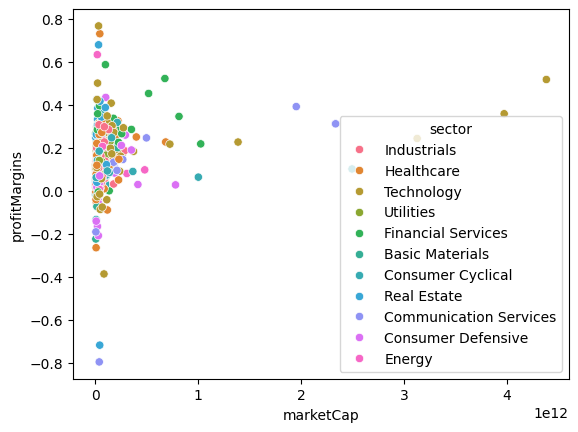

In [551]:
sns.scatterplot(data=df, x="marketCap", y="profitMargins", hue="sector")

<Axes: title={'center': 'Capitalización total por sector'}, xlabel='sector'>

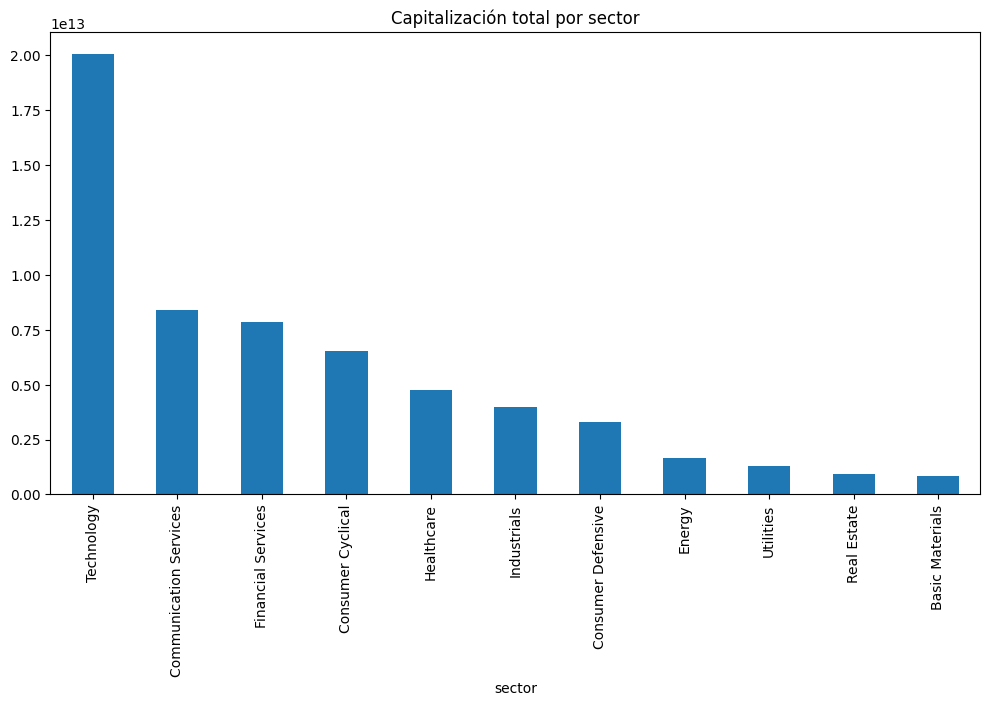

In [552]:
df.groupby("sector")["marketCap"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,6), title="Capitalización total por sector")

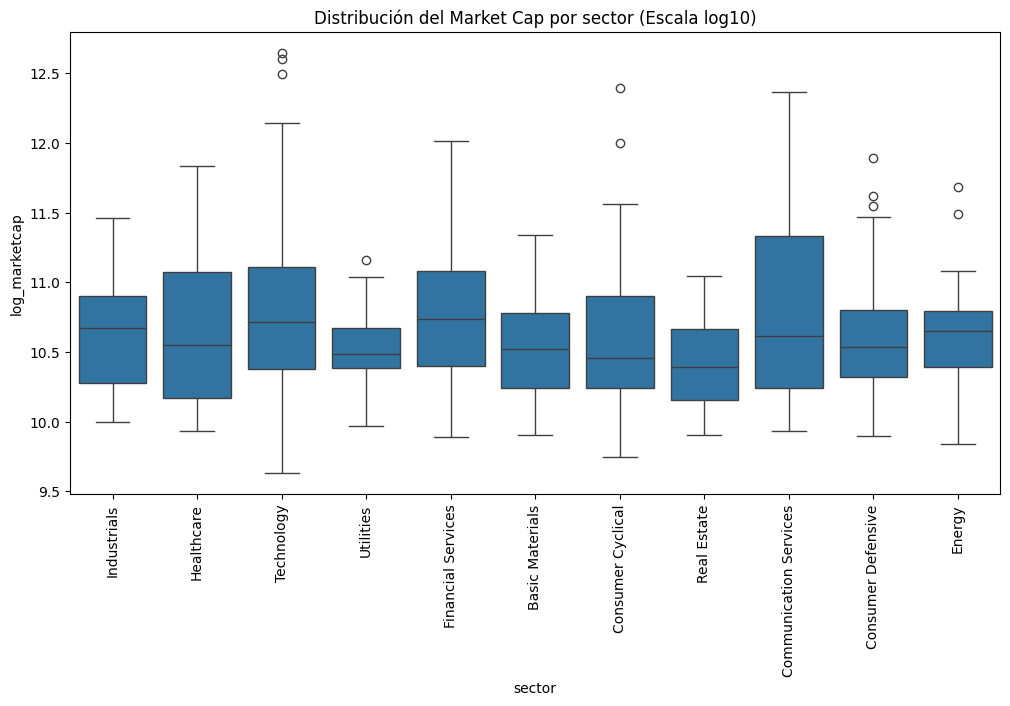

In [553]:
df["log_marketcap"] = np.log10(df["marketCap"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="sector", y="log_marketcap")
plt.xticks(rotation=90)
plt.title("Distribución del Market Cap por sector (Escala log10)")
plt.show()

SECTORES

In [555]:
media_sectores = df.groupby("sector")[["marketCap", "trailingPE", "forwardPE", "priceToBook", "dividendYield", "beta", "profitMargins", "returnOnEquity", "debtToEquity", "currentRatio", "earningsGrowth", "trailingPegRatio", "returnOnAssets", "epsForward"]].mean()

In [556]:
mediana_sectores = df.groupby("sector")[["marketCap", "trailingPE", "forwardPE", "priceToBook", "dividendYield", "beta", "profitMargins", "returnOnEquity", "debtToEquity", "currentRatio", "earningsGrowth", "trailingPegRatio", "returnOnAssets", "epsForward"]].median()

In [557]:
media_sectores

,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
sector,,,,,,,,,,,,,,
Basic Materials,4.510125e+10,26.939152,19.405856,3.860911,2.406842,1.074579,0.080533,0.125214,75.991053,1.847632,0.329342,2.024779,0.051604,8.120000
Communication Services,3.999877e+11,29.720107,22.506203,5.528169,1.585238,0.996951,0.085458,0.116220,96.487905,1.348667,0.305000,2.263152,0.069786,8.498333
Consumer Cyclical,1.127661e+11,32.765731,22.382712,2.498708,1.413103,1.209414,0.106922,0.295425,191.483672,1.679828,0.061871,2.189041,0.093809,24.238103
Consumer Defensive,9.365525e+10,23.656808,19.359413,9.554528,3.135714,0.565428,0.067978,0.352933,178.451286,1.109314,0.007271,3.019389,0.073826,5.476000
Energy,7.824880e+10,20.603512,14.309953,3.473030,3.243333,0.858714,0.148220,0.165409,93.696190,1.417429,0.040857,3.168733,0.068538,9.481429
Financial Services,1.173120e+11,30.878367,19.064303,4.032849,1.992090,1.026284,0.201025,0.187504,78.723015,1.596284,0.092955,2.691613,0.044973,12.067463
Healthcare,8.203035e+10,28.391288,19.079059,4.747061,1.380000,0.800602,0.120348,0.196698,124.278603,1.762569,0.100293,1.750159,0.066719,11.688448
Industrials,5.840979e+10,33.415746,25.965156,8.728909,1.373235,1.085513,0.133150,0.300824,114.122029,1.641662,-0.012184,2.488718,0.081510,11.704559
Real Estate,3.344984e+10,60.365242,40.904551,0.312339,3.925000,0.997999,0.174486,0.026841,111.806071,2.147250,0.043179,3.213657,0.032121,3.558929


In [558]:
mediana_sectores

,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward
sector,,,,,,,,,,,,,,
Basic Materials,3.320507e+10,25.788530,16.210182,2.149206,1.600,1.035000,0.074520,0.11870,63.9260,1.8270,0.0725,2.04440,0.056160,8.61
Communication Services,4.117304e+10,22.667297,21.641922,2.432646,0.840,1.014976,0.115800,0.16621,68.3210,1.2460,0.0810,2.04440,0.054510,5.15
Consumer Cyclical,2.849991e+10,24.506335,17.752422,3.901937,1.150,1.155500,0.092075,0.21922,82.3420,1.2495,0.0155,1.97565,0.075990,6.91
Consumer Defensive,3.411168e+10,23.198156,16.457405,4.105645,2.970,0.577000,0.069010,0.15166,102.1500,0.8950,-0.0380,2.04440,0.065180,4.58
Energy,4.468004e+10,16.097656,13.781702,1.837897,3.340,0.894000,0.114250,0.16197,63.5790,1.0790,0.0240,2.04440,0.060480,5.97
Financial Services,5.436316e+10,16.192888,15.639357,2.094384,1.730,1.015000,0.194930,0.13612,72.1690,1.2510,0.0870,2.04440,0.026770,9.18
Healthcare,3.564558e+10,25.336823,15.677986,2.891561,0.690,0.760000,0.113170,0.15166,73.3335,1.4085,0.0725,1.46105,0.061595,8.62
Industrials,4.724504e+10,27.625281,21.461444,5.354090,1.235,1.089500,0.132875,0.22362,73.8000,1.3335,0.0160,2.29000,0.070655,8.35
Real Estate,2.467407e+10,29.791417,34.583555,2.051528,4.020,0.909500,0.181630,0.06379,77.6460,1.1470,0.0725,2.04440,0.029255,2.39


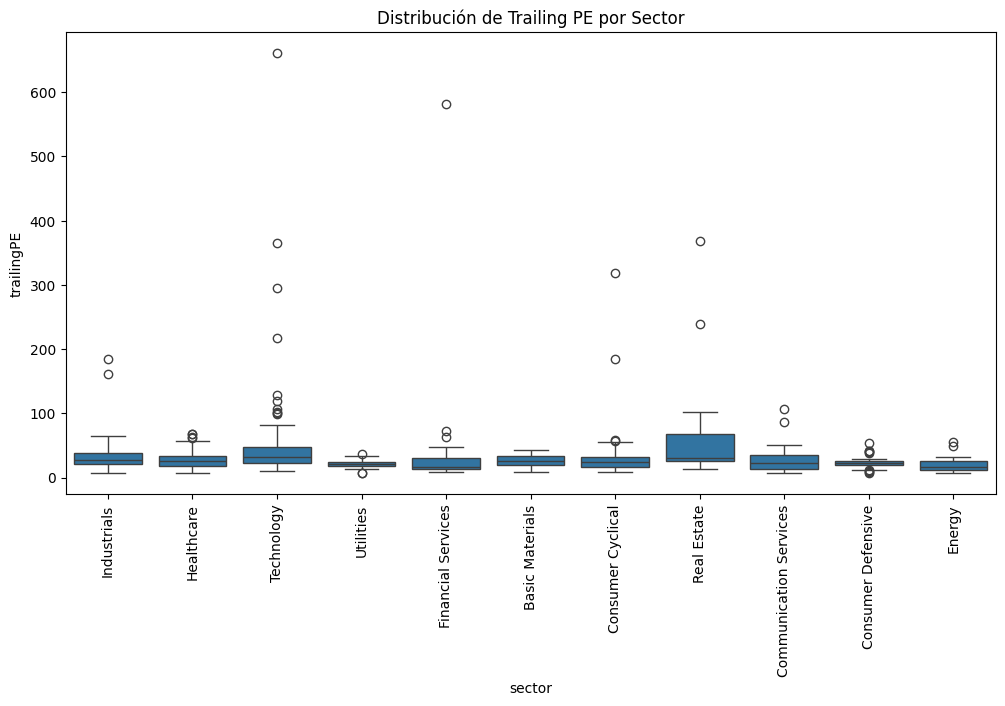

In [559]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sector", y="trailingPE", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de Trailing PE por Sector")
plt.show()

- Tecnología y Real Estate tienen los valores más altos

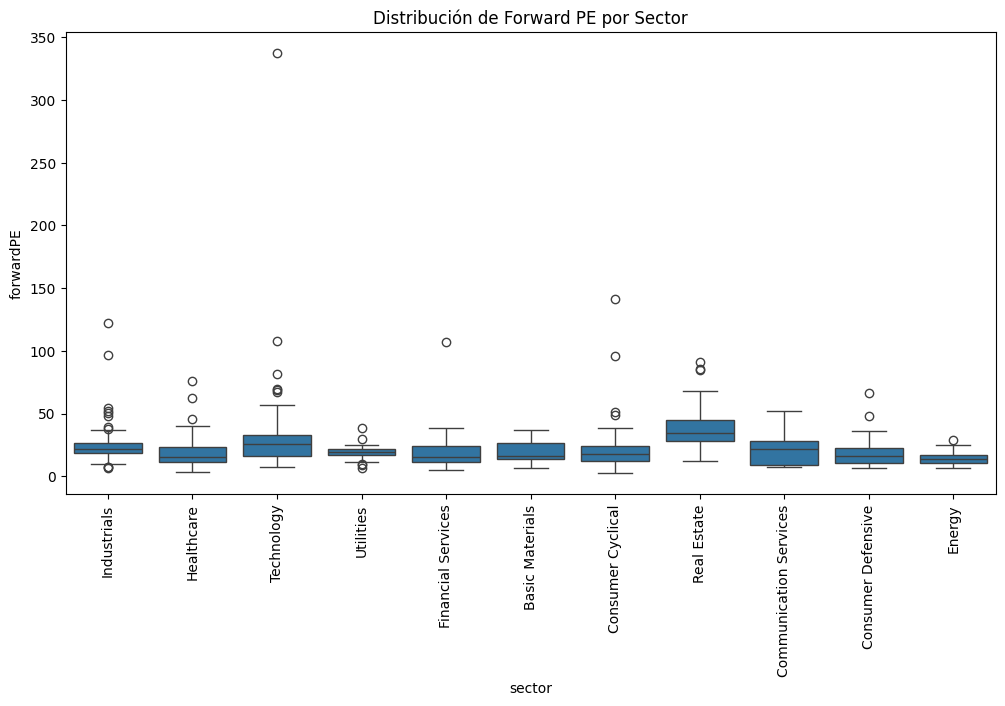

In [561]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sector", y="forwardPE", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de Forward PE por Sector")
plt.show()

- Trailing PE: Precio dividido por el EPS (ganancias por acción) de los últimos 12 meses.
- Forward PE: Precio dividido por el EPS esperado para los próximos 12 meses.
Cuando Forward PE < Trailing PE, el mercado espera que las ganancias aumenten.

1) Para casi todos los sectores se espera crecimiento de ganancias, con una menor expectativa para utilities y consumo defensivo. Sus gráficos son bastante similares.
2) Tecnología y Real Estate son muy dispersos, interesa ver individualmente como las empresas se comportan en este sector.

In [563]:
tyr_df = df[df["sector"].isin(["Technology", "Real Estate"])]

In [564]:
tyr_df

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap
4,ACN,1.680520e+11,Technology,21.447536,19.176262,5.499032,2.16,1.293,0.11607,0.26928,25.881,1.461,0.1470,2.1121,0.11245,14.07,11.225444
5,ADBE,1.514267e+11,Technology,22.853394,17.370804,13.314808,0.00,1.509,0.30392,0.52254,57.486,0.993,0.1290,1.1789,0.17851,20.55,11.180202
12,AKAM,1.110648e+10,Technology,26.184563,11.681138,2.486457,0.00,0.775,0.11262,0.09821,100.746,1.178,-0.2610,1.0906,0.03916,6.68,10.045576
14,ARE,1.325307e+10,Real Estate,25.317688,22.566860,0.769040,6.77,1.266,-0.00331,0.00784,62.825,1.620,0.0725,2.0444,0.01200,3.44,10.122316
33,APH,1.317190e+11,Technology,42.982070,49.946760,11.427285,0.63,1.139,0.16897,0.31049,69.505,2.016,1.0980,1.9541,0.12502,2.16,11.119648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,TEAM,5.108367e+10,Technology,25.317688,47.347930,37.408688,0.00,0.949,-0.08659,-0.34334,89.896,1.262,0.0725,2.3144,-0.01928,4.11,10.708282
509,GFS,2.087586e+10,Technology,25.317688,21.016760,1.887891,0.00,1.500,-0.02770,-0.01652,14.688,2.514,0.5820,2.0444,0.02619,1.79,10.319644
510,MRVL,7.007961e+10,Technology,25.317688,32.512000,5.264249,0.29,1.813,-0.07560,-0.03537,33.892,1.305,0.0725,2.0444,0.01228,2.50,10.845592
514,SHOP,1.628868e+11,Technology,101.540650,67.510810,14.659037,0.00,2.615,0.17166,0.16145,10.298,3.706,0.0725,2.0444,0.07078,1.85,11.211886


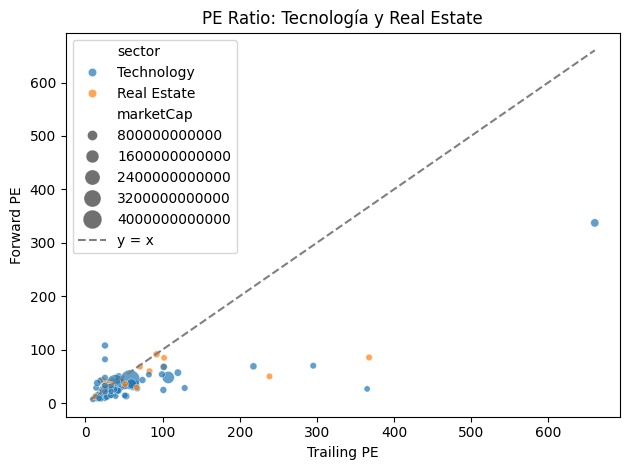

In [565]:
sns.scatterplot(
    data=tyr_df,
    x="trailingPE",
    y="forwardPE",
    hue="sector",
    size="marketCap", 
    sizes=(20, 200),
    alpha=0.7
)

min_val = min(tyr_df["trailingPE"].min(), tyr_df["forwardPE"].min())
max_val = max(tyr_df["trailingPE"].max(), tyr_df["forwardPE"].max())
plt.plot([min_val, max_val], [min_val, max_val], color="gray", linestyle="--", label="y = x")

plt.xlabel("Trailing PE")
plt.ylabel("Forward PE")
plt.title("PE Ratio: Tecnología y Real Estate")
plt.legend()
plt.tight_layout()
plt.savefig("PE_Ratio.png", dpi=300, bbox_inches="tight")
plt.show()

Se espera una caída de ganancias para algunas empresas más pequeñas del sector tecnológico.

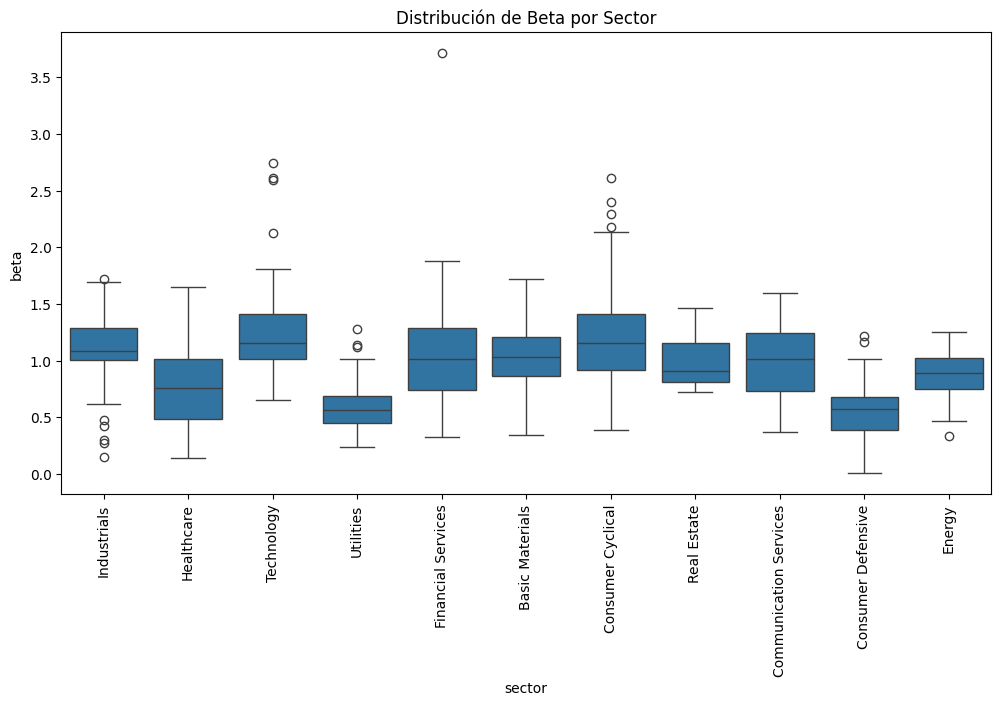

In [567]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sector", y="beta", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de Beta por Sector")
plt.show()

- Los sectores de tecnología, de finanzas y de consumo cíclico son los más sensibles a la volatilidad del mercado.
- Los sectores de utilities y de consumo defensivo son los más estables y menos volátiles. 

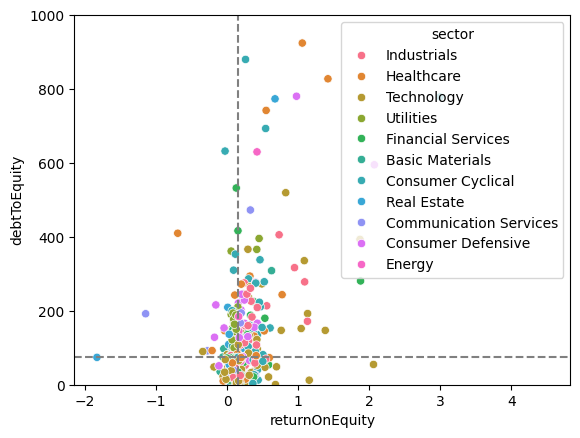

In [569]:
sns.scatterplot(data=df, x="returnOnEquity", y="debtToEquity", hue="sector")
plt.ylim(0, 1000)
plt.axvline(x=df["returnOnEquity"].median(), color="gray", linestyle="--")
plt.axhline(y=df["debtToEquity"].median(), color="gray", linestyle="--")

|              |  **Bajo ROE**                                                           |  **Alto ROE**                                       
| ------------ | ------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------- |
| **Alta deuda** | Zona de alerta. Insostenible si no crece el ROE | Riesgo potencial si la deuda crece más que el beneficio. |
| **Baja deuda** | Potencial de mejora, bajo riesgo.   | Empresas muy eficientes.    |

PRICE TO BOOK (PB Ratio):

<Axes: xlabel='returnOnEquity', ylabel='priceToBook'>

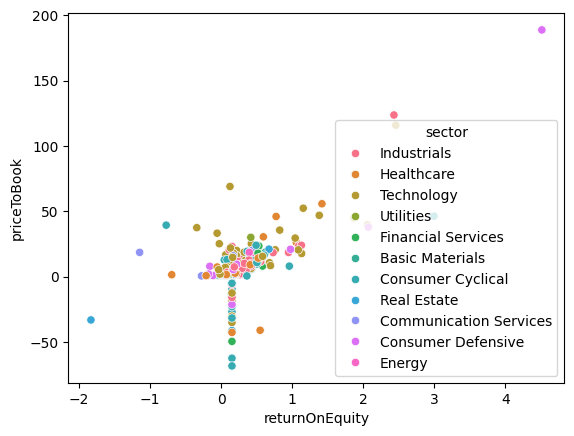

In [572]:
sns.scatterplot(data=df, x="returnOnEquity", y="priceToBook", hue="sector")

Las empresas con alto ROE cotizan a mayor P/B ratio

In [574]:
df[(df["returnOnEquity"] > 0.15) & (df["priceToBook"] < 2)].sort_values(by=["returnOnEquity", "priceToBook"], ascending=[False, True])

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap
138,DVA,1.073571e+10,Healthcare,14.092262,12.604259,-41.102432,0.00,1.106,0.06628,0.54794,742.203,1.251,-0.2450,2.0376,0.07041,11.27,10.030831
513,PDD,1.609883e+11,Consumer Cyclical,12.141328,8.048262,0.478758,0.00,0.416,0.24629,0.36170,3.413,2.273,-0.4750,1.4036,0.13560,14.09,11.206794
143,DAL,3.486742e+10,Industrials,7.761628,7.606838,1.986016,1.40,1.491,0.07243,0.30074,128.326,0.385,0.6270,2.0444,0.04523,7.02,10.542420
36,APA,6.973330e+09,Energy,6.926524,7.027273,1.284907,5.13,1.250,0.10041,0.26176,84.961,0.885,1.1810,2.0444,0.08232,2.75,9.843440
320,MOH,8.573334e+09,Healthcare,7.799783,6.152454,1.855675,0.00,0.554,0.02710,0.23925,77.406,1.665,-0.0810,2.0444,0.06598,25.71,9.933150
385,PHM,2.234992e+10,Consumer Cyclical,8.472700,8.391111,1.780040,0.78,1.299,0.15499,0.23048,18.024,6.409,-0.2090,0.3368,0.12946,13.50,10.349276
144,DVN,2.140119e+10,Energy,7.592256,7.473095,1.475758,2.84,1.060,0.17494,0.20963,60.969,1.079,-0.1830,2.0444,0.09558,4.46,10.330438
427,SYF,2.626729e+10,Financial Services,8.578372,10.911901,1.669386,1.71,1.452,0.35787,0.20233,74.026,1.251,0.6130,2.0444,0.02728,6.47,10.419415
450,TRV,5.888605e+10,Financial Services,11.573451,12.308705,1.994616,1.70,0.519,0.10966,0.19294,27.217,0.321,1.8520,3.7836,0.03215,21.25,10.770012
464,UHS,1.082921e+10,Healthcare,8.854057,9.253855,1.538398,0.48,1.285,0.07661,0.18789,70.090,1.290,0.2750,2.0444,0.07808,18.16,10.034597


PEG RATIO:

<Axes: xlabel='trailingPegRatio', ylabel='trailingPE'>

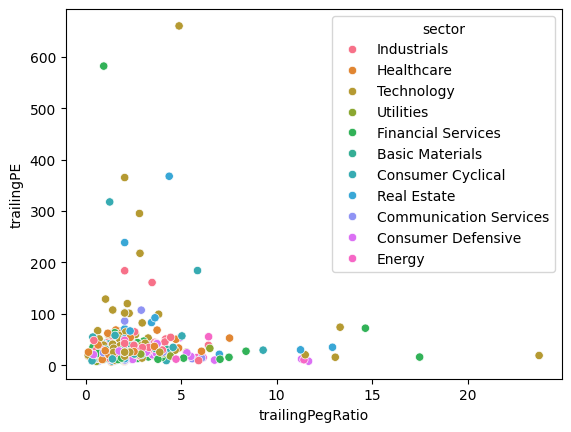

In [576]:
sns.scatterplot(data=df, x="trailingPegRatio", y="trailingPE", hue="sector")

- Un PEG alto y un PE bajo indica que el crecimiento de la empresa no alcanza para justificar el precio actual

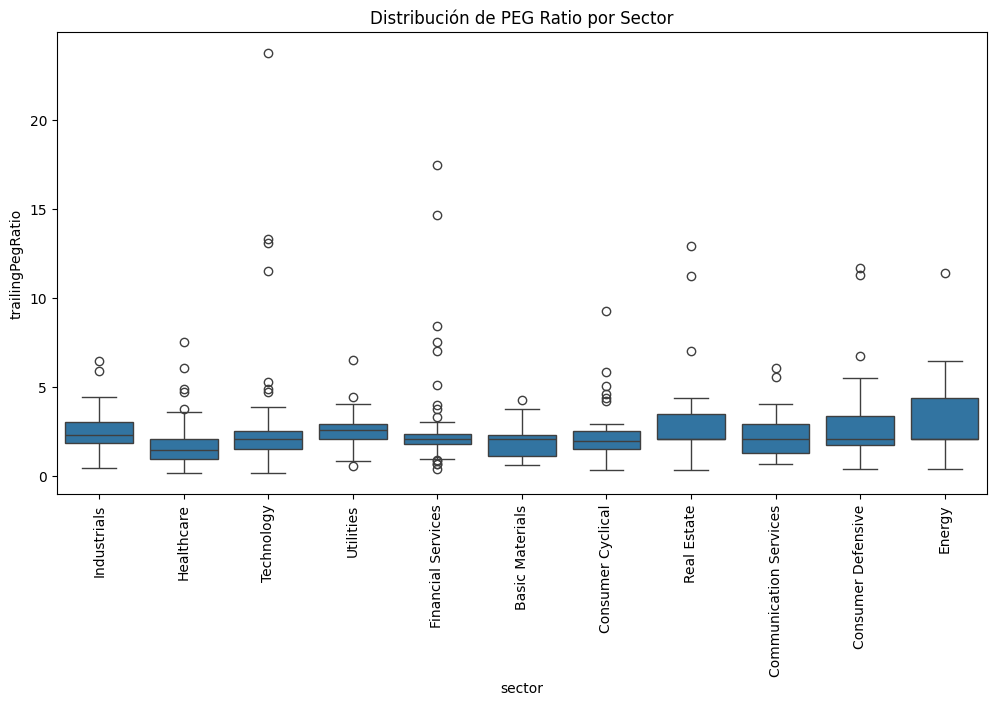

In [578]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sector", y="trailingPegRatio", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de PEG Ratio por Sector")
plt.show()

- Los sectores de finanzas, salud, tecnología y servicios de comunicación tienen medianas de PEG Ratio por debajo de 2. Esto refleja un precio económico o razonable de la acción respecto a su crecimiento.
- Los sectores de energía y real estate están mas caros respecto a su crecimiento, debido a que presentan mediana y valores más altos de PEG que el resto.
- Los sectores de tecnología y finanzas son bastante heterogéneos.

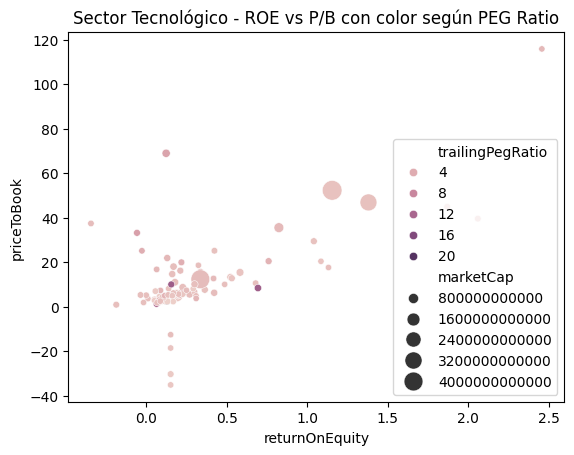

In [580]:
sns.scatterplot(data=df[df["sector"] == "Technology"], x="returnOnEquity", y="priceToBook", hue="trailingPegRatio", size="marketCap", sizes=(20, 200))
plt.title(f"Sector Tecnológico - ROE vs P/B con color según PEG Ratio")
plt.savefig("PB_Tecnologico.png", dpi=300, bbox_inches="tight")
plt.show()

In [581]:
df_tecnología = df[df["sector"] == "Technology"]
df_tecnología[(df_tecnología["returnOnEquity"] > 0.15) & (df_tecnología["priceToBook"] < 3) & (df_tecnología["trailingPegRatio"] < 2)]

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap
113,CTSH,3.577280e+10,Technology,14.720081,14.543087,2.493215,1.69,0.952,0.11732,0.16605,7.913,2.215,0.220,1.7501,0.10094,4.99,10.553553
142,DELL,9.073664e+10,Technology,21.026644,14.271276,-30.295843,1.57,1.098,0.04716,0.15166,74.026,0.851,0.000,1.0216,0.05363,9.40,10.957783
190,FICO,3.377046e+10,Technology,59.748062,37.324455,-35.152153,0.00,1.285,0.31357,0.15166,74.026,2.112,0.277,1.1745,0.28703,37.17,10.528537
196,FSLR,1.861327e+10,Technology,14.745963,8.320230,2.273424,0.00,1.515,0.29717,0.16766,7.700,1.929,-0.114,0.4391,0.07502,20.86,10.269823
237,HPQ,2.362741e+10,Technology,9.675000,6.987500,-18.564575,4.61,1.291,0.04636,0.15166,74.026,0.733,-0.311,1.5490,0.06333,3.60,10.373416


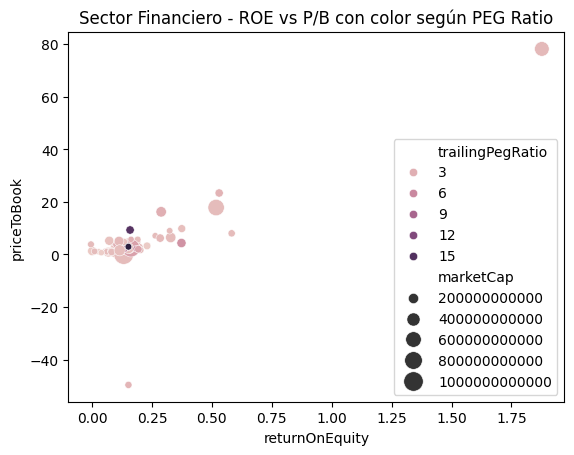

In [582]:
sns.scatterplot(data=df[df["sector"] == "Financial Services"], x="returnOnEquity", y="priceToBook", hue="trailingPegRatio", size="marketCap", sizes=(20, 200))
plt.title(f"Sector Financiero - ROE vs P/B con color según PEG Ratio")
plt.savefig("PB_Financiero.png", dpi=300, bbox_inches="tight")
plt.show()

In [583]:
df_finanzas = df[df["sector"] == "Financial Services"]
df_finanzas[(df_finanzas["returnOnEquity"] > 0.15) & (df_finanzas["priceToBook"] < 3) & (df_finanzas["trailingPegRatio"] < 2)]

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap
311,MET,5.115962e+10,Financial Services,12.452615,7.864809,1.866337,3.04,0.832,0.06128,0.15982,172.754,1.600,0.164,1.0665,0.006260,9.69,10.708927
326,MS,2.284872e+11,Financial Services,16.192888,18.030668,2.366997,2.76,1.300,0.22490,0.15166,416.642,1.251,0.170,1.7952,0.067585,7.93,11.358862
390,RJF,3.365800e+10,Financial Services,16.499020,15.106821,2.817701,1.18,1.038,0.15492,0.15166,36.485,1.251,-0.082,1.3794,0.067585,11.14,10.527088


<Axes: xlabel='trailingPegRatio', ylabel='earningsGrowth'>

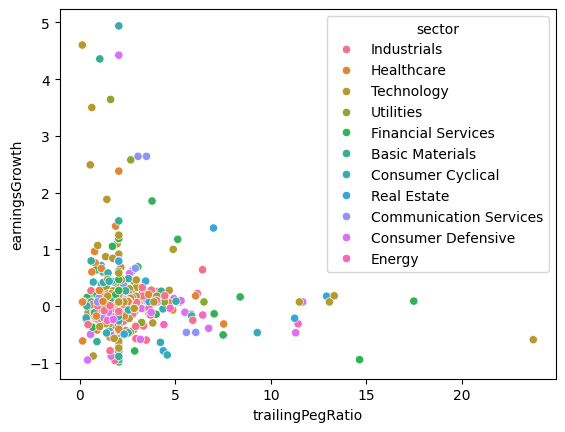

In [584]:
sns.scatterplot(data=df, x="trailingPegRatio", y="earningsGrowth", hue="sector")

In [585]:
df[(df["earningsGrowth"] > 1) & (df["trailingPegRatio"] < 2)]

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap
33,APH,1.317190e+11,Technology,42.982070,49.946760,11.427285,0.63,1.139,0.16897,0.31049,69.505,2.016,1.098,1.9541,0.125020,2.16,11.119648
69,BSX,1.564666e+11,Healthcare,62.952385,37.906810,7.043154,0.00,0.681,0.13550,0.15166,52.163,1.251,1.409,1.8766,0.067585,2.79,11.194422
71,AVGO,1.389123e+12,Technology,107.396360,47.867096,4.987082,0.78,1.138,0.22643,0.18977,166.032,1.077,1.881,1.4193,0.080140,6.17,12.142741
124,GLW,5.392033e+10,Technology,67.053190,27.285715,4.587336,1.79,1.097,0.05765,0.08277,64.963,1.497,3.500,0.6326,0.041280,2.31,10.731753
168,ENPH,4.257906e+09,Technology,25.244186,8.897540,4.834471,0.00,1.666,0.11782,0.19795,140.210,1.969,2.489,0.5524,0.037440,3.66,9.629196
169,ETR,4.032412e+10,Utilities,22.414390,11.670544,2.572551,2.69,0.573,0.11239,0.08853,199.493,0.825,3.643,1.6141,0.030680,7.74,10.605565
271,KEYS,2.857526e+10,Technology,38.974174,23.820660,5.207641,0.00,1.096,0.14526,0.14297,50.484,3.387,1.069,0.9402,0.056860,6.97,10.455990
315,MU,1.225895e+11,Technology,19.736937,8.511267,2.415382,0.40,1.349,0.18410,0.13109,31.948,2.755,4.602,0.1356,0.065500,12.87,11.088453
327,MOS,1.139335e+10,Basic Materials,30.961208,14.599594,0.967929,2.43,1.131,0.03324,0.03285,40.476,1.123,4.357,1.0505,0.021370,2.46,10.056652
330,NDAQ,5.543319e+10,Financial Services,37.156925,30.766878,4.694266,1.13,1.018,0.18592,0.13254,81.977,0.960,1.053,1.7119,0.046440,3.14,10.743770


- Las empresas con bajo PEG y alto crecimiento son potencialmente infravaloradas si mantienen ese ritmo. Mayormente son las empresas tecnológicas las que cumplen esta condición.

DIVIDEND YIELD

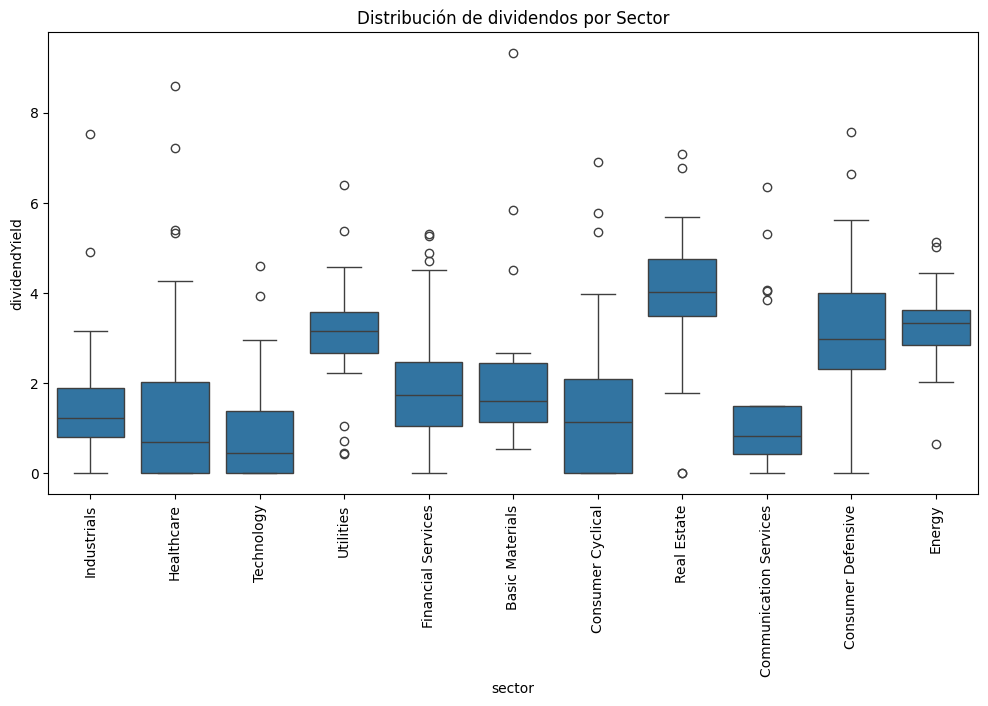

In [588]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sector", y="dividendYield", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de dividendos por Sector")
plt.show()

- Los sectores de energía, consumo defensivo, real estate y utilities son los que más dividendos pagan.

<Axes: xlabel='beta', ylabel='dividendYield'>

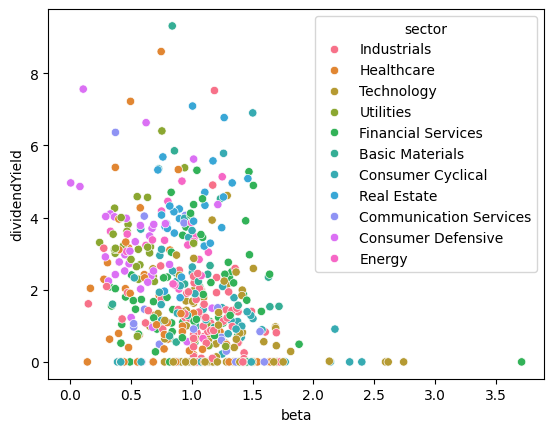

In [590]:
sns.scatterplot(data=df, x="beta", y="dividendYield", hue="sector")

- Los dividendos mas altos se concentran en las betas mas bajas. Esto sugiere que las empresas más estables pagan más dividendos que las volátiles.
- Para los casos de betas altas y dividendos bajos, se supone que las empresas prefieren reinvertir y crecer en vez de pagarle a sus accionistas.

ROE, ROA, EPS FORWARD Y PROFIT MARGINS:

In [593]:
rentabilidad = ["returnOnEquity", "returnOnAssets", "profitMargins", "epsForward"]

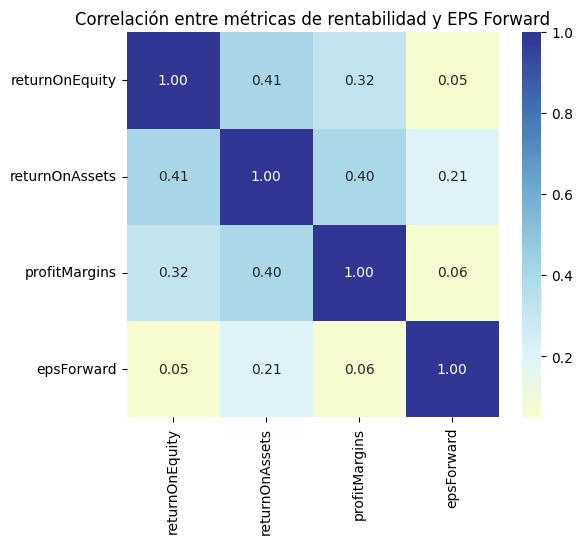

In [594]:
corr = df[rentabilidad].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="RdYlBu", center=0, fmt=".2f")
plt.title("Correlación entre métricas de rentabilidad y EPS Forward")
plt.show()

- No se observan correlaciones fuertes entre estas métricas

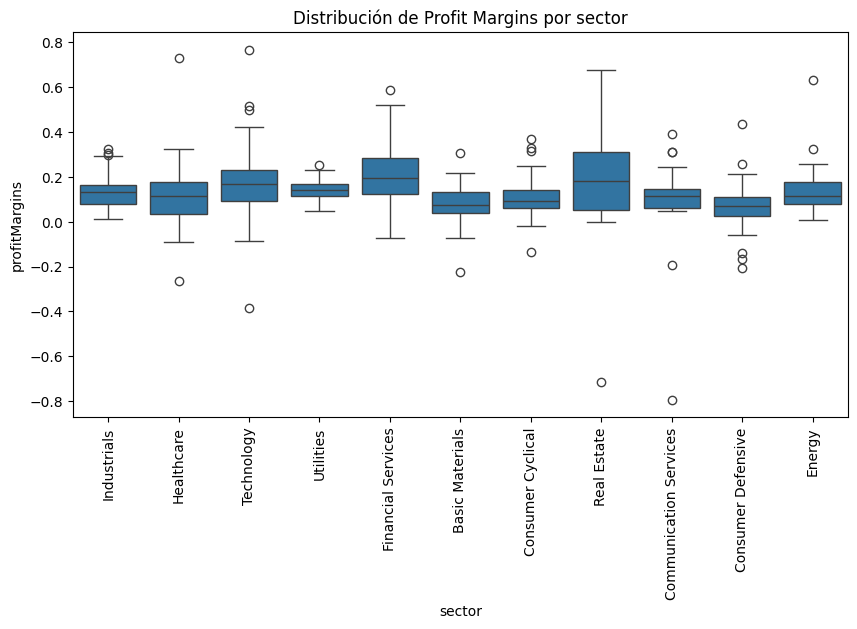

In [596]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="sector", y="profitMargins")
plt.xticks(rotation=90)
plt.title("Distribución de Profit Margins por sector")
plt.show()

- Los sectores de finanzas, tecnología y real estate tienen las medianas más altas. Las empresas tecnológicas tienen márgenes altos pero con más dispersión.
- Los márgenes de los sectores de utilities y energía son más estables. 

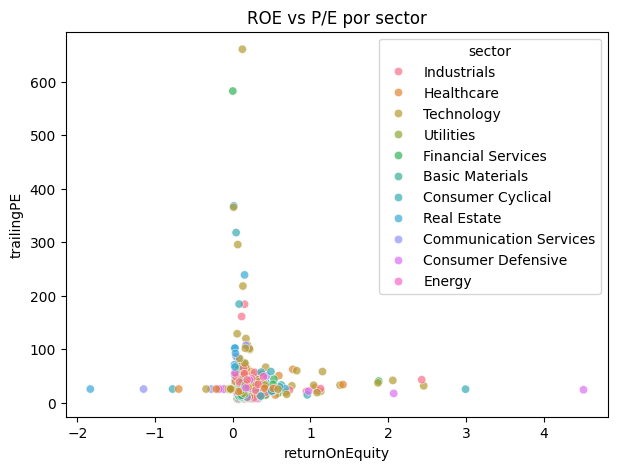

In [598]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="returnOnEquity", y="trailingPE", hue="sector", alpha=0.7)
plt.title("ROE vs P/E por sector")
plt.show()

- Las empresas con PE Ratio alto y ROE bajo sugieren sobrevaluación y grandes expectativas, que podrían no estar alineadas con la realidad.

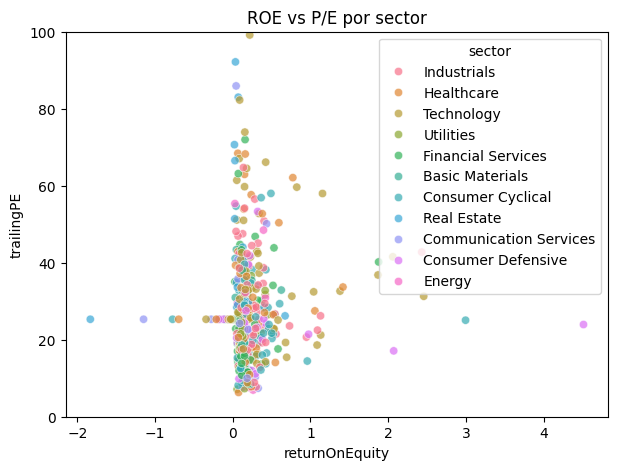

In [600]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="returnOnEquity", y="trailingPE", hue="sector", alpha=0.7)
plt.ylim(0, 100)
plt.title("ROE vs P/E por sector")
plt.show()

In [601]:
df[(df["returnOnEquity"] > 1) & (df["trailingPE"] < 60)]

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap
32,AMGN,1.621304e+11,Healthcare,27.486088,14.587440,26.119404,3.16,0.480000,0.17386,1.05673,924.456,1.170,0.0725,1.0004,0.07037,20.67,11.209864
38,AAPL,3.128602e+12,Technology,32.627728,25.206978,46.850815,0.50,1.199000,0.24301,1.38015,146.994,0.821,0.0780,1.9492,0.23810,8.31,12.495350
92,COR,5.641267e+10,Healthcare,33.686630,17.790493,55.682510,0.75,0.568000,0.00546,1.41780,827.730,0.873,0.7610,0.8063,0.02974,16.36,10.751377
115,CL,6.851290e+10,Consumer Defensive,23.949009,21.901556,188.705350,2.42,0.371000,0.14518,4.51259,1128.104,0.847,0.0240,1.8624,0.16023,3.86,10.835772
200,FTNT,7.726875e+10,Technology,41.543210,41.887962,39.557210,0.00,1.063000,0.30597,2.05906,54.842,1.363,0.4360,2.8399,0.13325,2.41,10.888004
207,IT,2.624186e+10,Technology,21.229765,25.849130,17.615604,0.00,1.191000,0.19816,1.13185,192.540,1.090,0.0150,2.0444,0.09032,13.19,10.418995
220,GDDY,2.313813e+10,Technology,31.288343,24.200672,115.824900,0.00,1.055000,0.16203,2.45696,1945.769,0.556,-0.4530,2.6544,0.07826,6.71,10.364328
232,HD,3.674020e+11,Consumer Cyclical,25.069586,23.671473,46.188244,2.47,1.004000,0.08984,2.99519,778.781,1.093,-0.0500,4.3562,0.15122,15.60,11.565142
245,ITW,7.513104e+10,Industrials,22.484636,23.934580,23.319979,2.37,1.014976,0.21311,1.09023,278.325,1.585,0.0160,3.6759,0.16324,10.70,10.875819
272,KMB,4.166613e+10,Consumer Defensive,17.107630,16.457405,37.845085,4.02,0.364000,0.12482,2.07060,595.098,0.763,-0.1100,5.5041,0.11543,7.63,10.619783


CURRENT RATIO

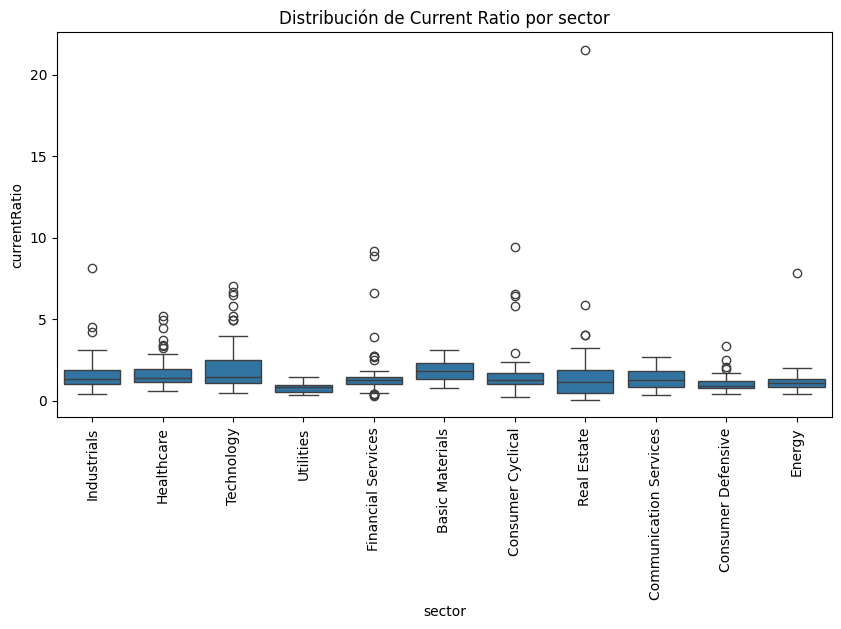

In [603]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="sector", y="currentRatio")
plt.xticks(rotation=90)
plt.title("Distribución de Current Ratio por sector")
plt.show()

<Axes: xlabel='currentRatio', ylabel='debtToEquity'>

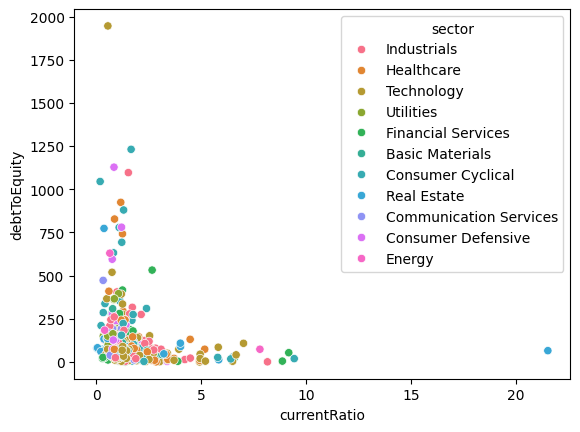

In [604]:
sns.scatterplot(data=df, x="currentRatio", y="debtToEquity", hue="sector")

- Las empresas con bajo ratio de liquidez (Current Ratio) y baja deuda son más estables
- Las empresas con bajo ratio de liquidez y alta deuda son empresas de alto riesgo
- Las empresas con alto ratio de liquidez tienen baja deuda y podrían reflejar una cautela ante la incertidumbre y/o una menor agresividad en expansión.

#### B) ANÁLISIS GENERAL

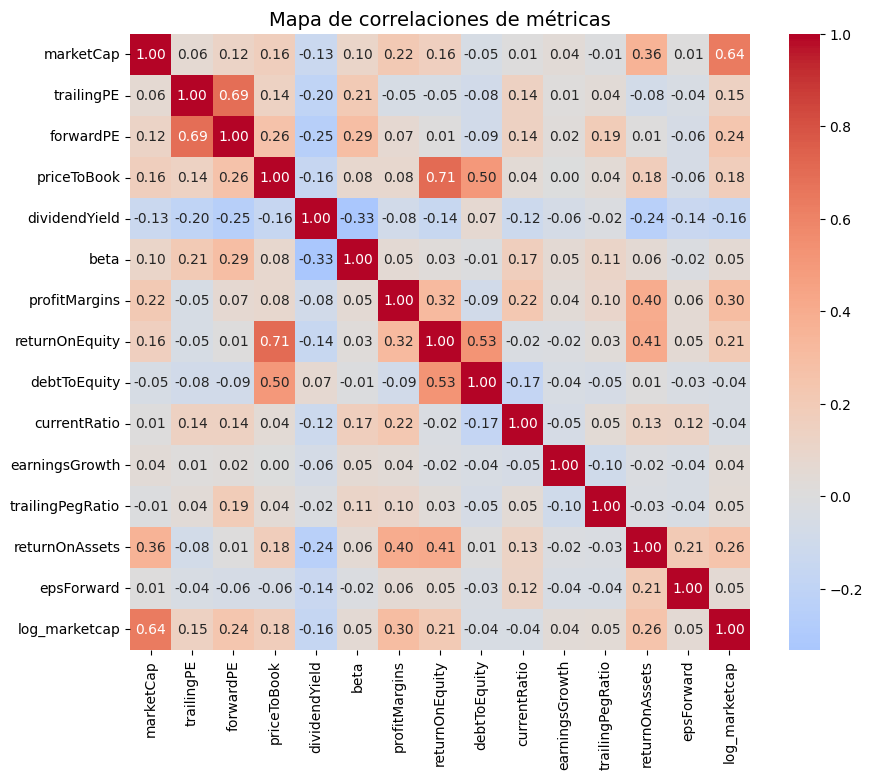

In [607]:
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include="number").corr(method="pearson")
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Mapa de correlaciones de métricas", fontsize=14)
plt.savefig("Mapa_Correlaciones.png", dpi=300, bbox_inches="tight")
plt.show()

CORRELACIONES MAYORES A 0.5:
- Price to Book, Return On Equity
- Debt to Equity, Return On Equity
- Debt to Equity, Price to Book
- Trailing PE y Forward PE

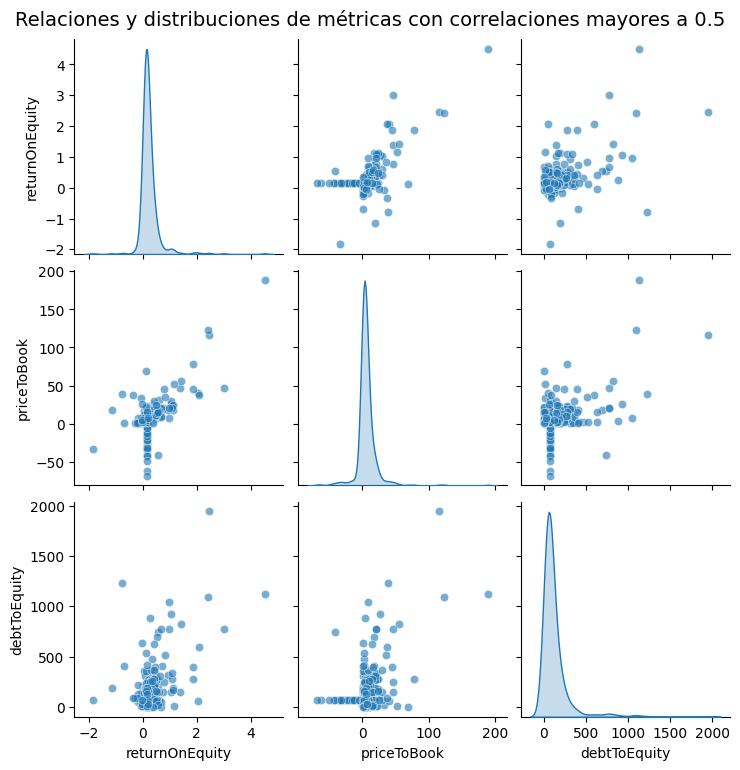

In [609]:
var_corr = ["returnOnEquity", "priceToBook", "debtToEquity"]
sns.pairplot(df[var_corr], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Relaciones y distribuciones de métricas con correlaciones mayores a 0.5", y=1.02, fontsize=14)
plt.show()

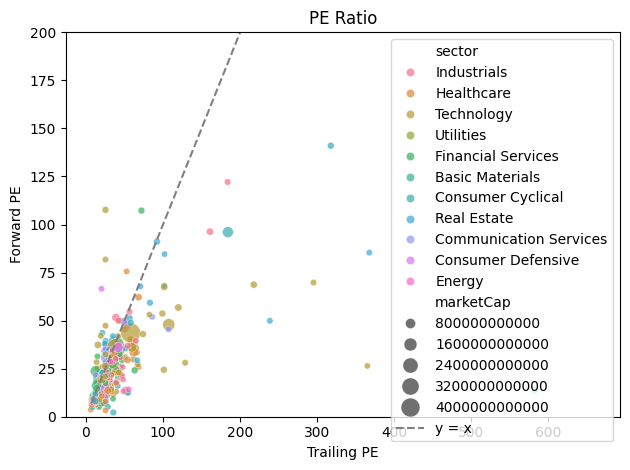

In [610]:
sns.scatterplot(
    data=df,
    x="trailingPE",
    y="forwardPE",
    hue="sector",
    size="marketCap", 
    sizes=(20, 200),
    alpha=0.7
)

min_val = min(tyr_df["trailingPE"].min(), tyr_df["forwardPE"].min())
max_val = max(tyr_df["trailingPE"].max(), tyr_df["forwardPE"].max())
plt.plot([min_val, max_val], [min_val, max_val], color="gray", linestyle="--", label="y = x")

plt.xlabel("Trailing PE")
plt.ylabel("Forward PE")
plt.ylim(0, 200)
plt.title("PE Ratio")
plt.legend()
plt.tight_layout()
plt.show()

In [611]:
df["pe_dif"] = (df["forwardPE"] - df["trailingPE"]) / df["trailingPE"] * 100
df.sort_values("pe_dif").head(10)  

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap,pe_dif
83,COF,1.377483e+11,Financial Services,582.162100,13.754789,1.305067,1.12,1.149,0.00000,0.00013,74.026,1.251,0.0725,0.9475,0.00002,15.66,11.139086,-97.637292
349,ORLY,8.406270e+10,Consumer Cyclical,35.494625,2.203605,-68.390884,0.00,0.583,0.14155,0.15166,74.026,0.724,0.1090,2.1923,0.13619,44.94,10.924603,-93.791722
139,DAY,9.341847e+09,Technology,365.187500,26.438913,3.606567,0.00,1.087,0.01431,0.01031,47.498,1.021,1.2500,2.0444,0.00551,2.21,9.970433,-92.760181
472,VTRS,1.048683e+10,Healthcare,25.317688,3.346442,0.676997,5.33,0.889,-0.26448,-0.21254,92.384,1.682,0.0725,0.1484,0.02235,2.67,10.020644,-86.782197
447,TSCO,3.054500e+10,Consumer Cyclical,28.379310,5.176101,12.267887,1.59,0.748,0.07178,0.45345,223.159,1.283,0.0310,2.7146,0.09032,11.13,10.484940,-81.761006
259,IRM,2.886710e+10,Real Estate,238.634140,49.918365,-41.317566,3.21,1.102,0.01948,0.15166,74.026,0.616,-0.8000,2.0444,0.04163,1.96,10.460403,-79.081633
495,WDAY,6.207421e+10,Technology,128.640880,28.053010,6.970423,0.00,1.210,0.05600,0.05702,38.042,2.067,-0.3630,1.0434,0.02383,8.30,10.792911,-78.192772
415,SW,2.341228e+10,Consumer Cyclical,54.695120,12.423822,1.339326,3.64,1.002,0.01982,0.04226,79.485,1.428,0.0000,0.3759,0.03540,3.61,10.369444,-77.285319
127,CSGP,4.050518e+10,Real Estate,367.730770,85.366070,4.704985,0.00,0.890,0.03574,0.01303,12.947,5.834,-0.7890,4.3734,-0.00041,1.12,10.607511,-76.785715
137,DDOG,4.895033e+10,Technology,295.291700,69.822660,16.762062,0.00,1.026,0.05848,0.06476,64.364,2.737,-0.4170,2.8176,0.00368,2.03,10.689756,-76.354683


Según como varía el Trailing PE y el Forward PE, estan son las 10 empresas que el mercado espera mayor crecimiento.

In [613]:
df.sort_values("pe_dif", ascending=False).head(10)

,Ticker,marketCap,sector,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap,pe_dif
130,CRWD,1.145644e+11,Technology,25.317688,107.644035,33.175030,0.00,1.157,-0.04166,-0.05738,22.498,1.849,0.0725,5.2781,-0.01467,4.27,11.059050,325.173243
267,K,2.771300e+10,Consumer Defensive,20.120554,66.565500,7.078926,2.91,0.289,0.10925,0.38149,155.528,0.800,0.1150,3.5040,0.08120,1.20,10.442684,230.833336
516,ZS,4.532856e+10,Technology,25.317688,81.779495,25.112999,0.00,1.109,-0.01523,-0.02676,68.101,1.236,0.0725,3.8830,-0.01614,3.56,10.656372,223.013282
456,UBER,1.844098e+11,Technology,15.443957,37.366528,8.394574,0.00,1.395,0.27074,0.69382,48.566,1.020,0.0725,13.0634,0.05214,2.36,11.265784,141.949184
323,MPWR,3.459378e+10,Technology,19.277216,42.055298,10.588089,0.85,1.202,0.76587,0.67946,0.543,4.921,0.4760,2.0444,0.11995,17.18,10.538998,118.160641
292,L,1.908662e+10,Financial Services,14.921311,31.386204,1.113694,0.28,0.701,0.07466,0.07998,49.606,0.488,-0.1510,2.0444,0.01654,2.90,10.280729,110.344815
177,ESS,1.816637e+10,Real Estate,21.160095,43.691030,3.006012,3.83,0.791,0.42403,0.15120,116.679,1.791,1.3760,6.9975,0.02945,6.02,10.259268,106.478421
451,TRMB,2.020116e+10,Technology,13.812398,28.412750,3.706119,0.00,1.674,0.42399,0.30996,25.668,0.843,0.1740,2.9529,0.03192,2.98,10.305376,105.704686
507,TEAM,5.108367e+10,Technology,25.317688,47.347930,37.408688,0.00,0.949,-0.08659,-0.34334,89.896,1.262,0.0725,2.3144,-0.01928,4.11,10.708282,87.015220
59,BRK.B,1.026650e+12,Financial Services,12.685818,23.697460,0.001046,0.00,0.818,0.21788,0.13187,19.175,2.716,-0.6370,2.0444,0.05789,20.08,12.011422,86.802775


Según como varía el Trailing PE y el Forward PE, estan son las 10 empresas que el mercado espera mayor decrecimiento.

# FILOSOFÍA DE INVERSIÓN

A la hora de invertir, priorizo los siguientes fundamentos en una empresa:
1) CRECIMIENTO: Elijo earningsGrowth y epsForward 
2) RENTABILIDAD: Elijo returnOnEquity
3) DEUDA Y LIQUIDEZ: Elijo debtToEquity y currentRatio
4) VALORACIÓN: Elijo trailingPE y trailingPegRatio

In [617]:
inv = ["Ticker", "earningsGrowth", "epsForward", "returnOnEquity", "returnOnAssets", "debtToEquity", "currentRatio", "trailingPE", "trailingPegRatio"]

In [618]:
df[inv]

,Ticker,earningsGrowth,epsForward,returnOnEquity,returnOnAssets,debtToEquity,currentRatio,trailingPE,trailingPegRatio
0,MMM,-0.3510,7.90,0.94760,0.073220,316.755,1.720,20.677778,3.3391
1,AOS,0.0090,4.07,0.27603,0.133320,18.035,1.647,19.752090,1.9303
2,ABT,0.3700,5.16,0.15166,0.067585,27.087,1.251,16.138018,2.0444
4,ACN,0.1470,14.07,0.26928,0.112450,25.881,1.461,21.447536,2.1121
5,ADBE,0.1290,20.55,0.52254,0.178510,57.486,0.993,22.853394,1.1789
...,...,...,...,...,...,...,...,...,...
511,MELI,0.4370,48.38,0.49107,0.077390,155.016,1.203,58.004173,1.5415
513,PDD,-0.4750,14.09,0.36170,0.135600,3.413,2.273,12.141328,1.4036
514,SHOP,0.0725,1.85,0.16145,0.070780,10.298,3.706,101.540650,2.0444
515,TRI,-0.0950,4.02,0.18456,0.063480,25.098,0.915,42.353683,2.0444


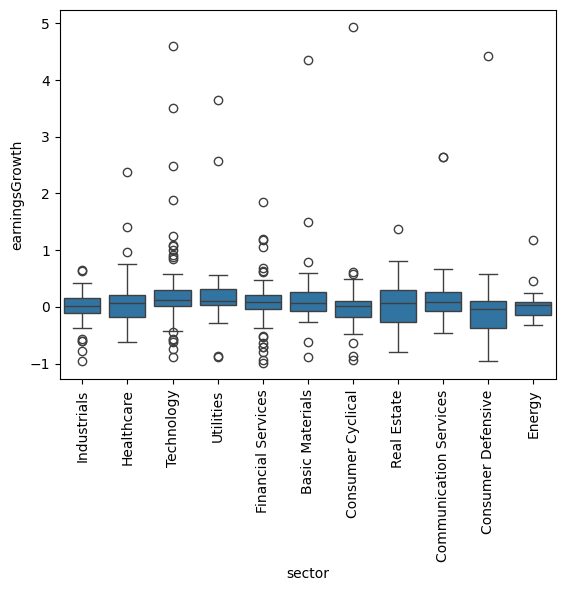

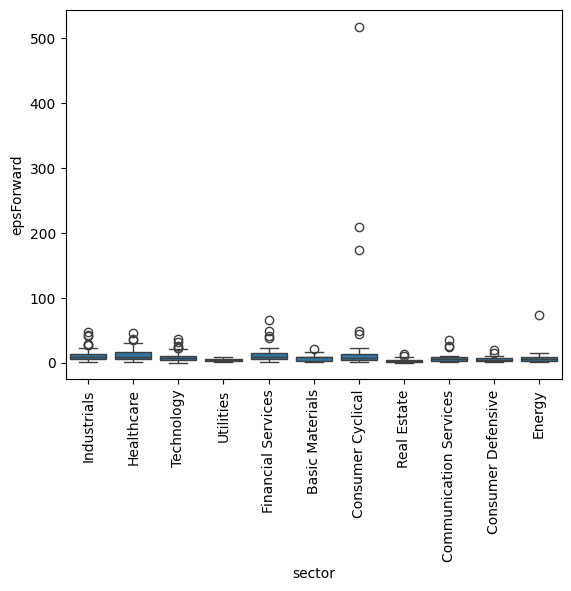

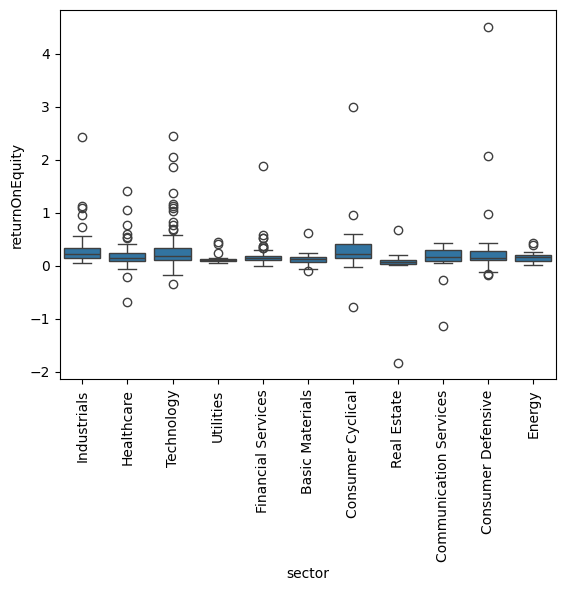

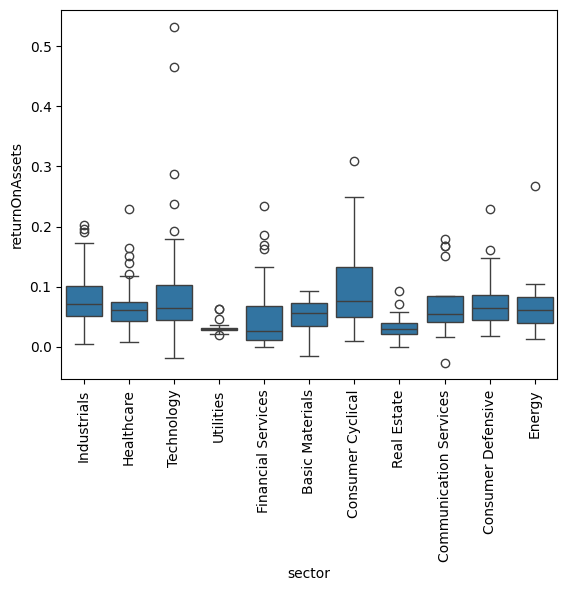

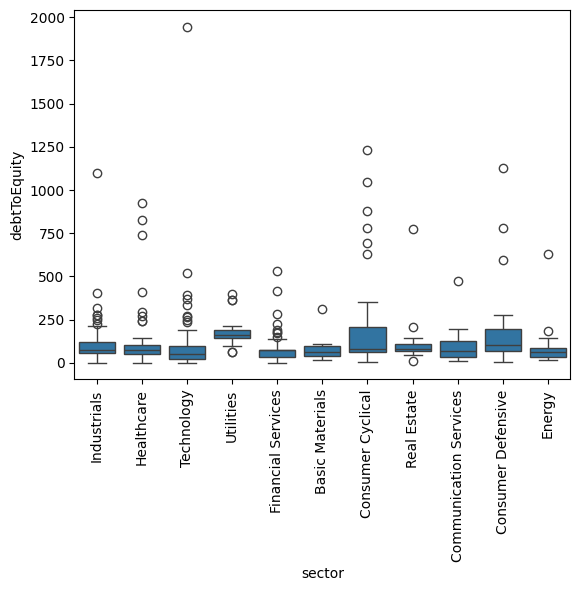

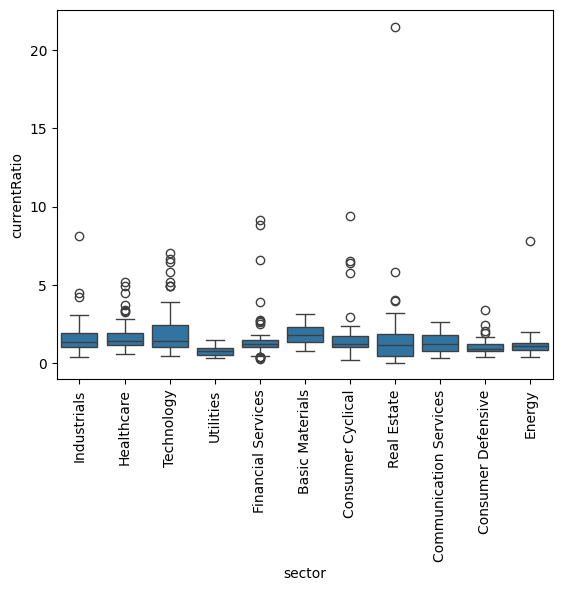

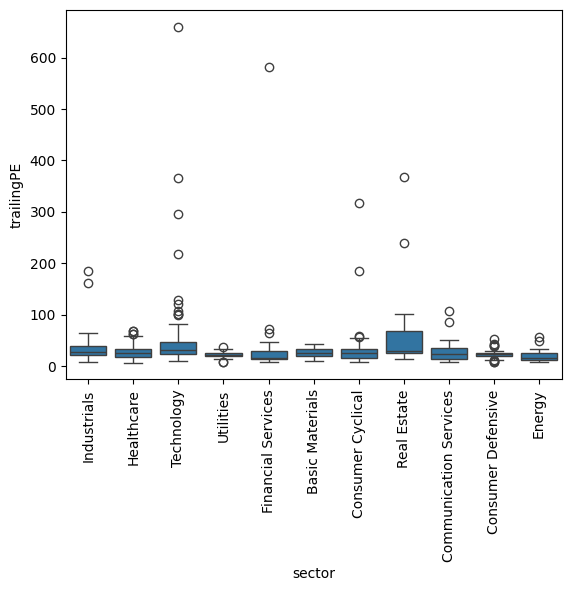

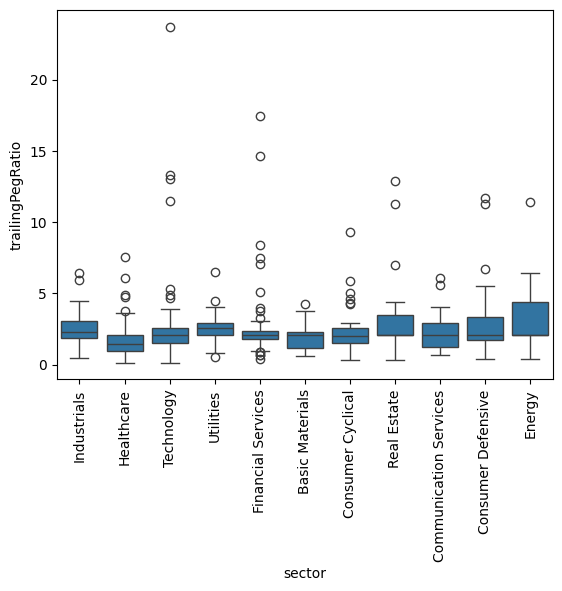

In [619]:
for i in inv[1:]:
    sns.boxplot(data=df, x="sector", y=i)
    plt.xticks(rotation=90)
    plt.show()

In [620]:
df_std.insert(0, "Ticker", df["Ticker"].values)
df_std["sector"] = df["sector"].values
df_std[inv]

,Ticker,earningsGrowth,epsForward,returnOnEquity,returnOnAssets,debtToEquity,currentRatio,trailingPE,trailingPegRatio
0,MMM,-0.727104,-0.116022,1.798602,0.088941,1.089921,0.053258,-0.276466,0.376052
1,AOS,-0.174415,-0.256968,0.106280,1.145655,-0.591657,0.006642,-0.294063,-0.262602
2,ABT,0.379808,-0.216855,-0.207126,-0.010140,-0.540701,-0.246231,-0.362766,-0.210877
3,ACN,0.037448,0.111037,0.089270,0.778706,-0.547490,-0.112132,-0.261833,-0.180187
4,ADBE,0.009814,0.349505,0.727472,1.940212,-0.369577,-0.410982,-0.235108,-0.603236
...,...,...,...,...,...,...,...,...,...
488,MELI,0.482670,1.373663,0.648169,0.162260,0.179447,-0.276883,0.433099,-0.438858
489,PDD,-0.917474,0.111773,0.322164,1.185743,-0.673969,0.406387,-0.438742,-0.501372
490,SHOP,-0.076927,-0.338665,-0.182456,0.046039,-0.635211,1.321457,1.260716,-0.210877
491,TRI,-0.334081,-0.258808,-0.124220,-0.082314,-0.551898,-0.460791,0.135587,-0.210877


In [621]:
df_std["debtToEquity"] = -df_std["debtToEquity"]
df_std["trailingPE"] = -df_std["trailingPE"]
df_std["trailingPegRatio"] = -df_std["trailingPegRatio"]
df_std["priceToBook"] = -df_std["priceToBook"]

In [622]:
df_std["Score"] = (
    0.25 * df_std["earningsGrowth"] +
    0.15 * df_std["epsForward"] +
    0.20 * df_std["returnOnEquity"] +
    0.10 * df_std["returnOnAssets"] +
    0.12 * df_std["currentRatio"] +
    0.08 * df_std["debtToEquity"] +
    0.10 * df_std["trailingPegRatio"]
)

In [623]:
df_std = df_std.sort_values("Score", ascending=False)

In [624]:
df_std.head(20)

,Ticker,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,sector,Score
329,NVR,-0.264556,0.365001,-0.426219,0.027725,-1.089158,-0.026961,0.020718,0.370849,0.542553,2.650959,-0.343292,0.210877,2.340216,18.657754,Consumer Cyclical,3.403638
298,MU,0.004511,0.294351,-0.706914,0.225307,-0.855552,0.812625,0.332081,-0.258962,0.513337,0.714177,6.876968,1.076198,-0.046797,0.066877,Technology,1.907190
108,CL,-0.138740,0.214281,-0.090840,-11.062818,0.324158,-1.480992,0.045394,10.782195,-5.657230,-0.504214,-0.151387,0.293384,1.618802,-0.264696,Consumer Defensive,1.757023
81,CCL,-0.211994,0.369619,-0.292415,0.132252,-1.089158,3.767592,-0.307882,0.167237,-0.918650,-0.829884,7.394346,0.210877,-0.291195,-0.343449,Consumer Cyclical,1.649407
71,BG,-0.277887,0.516394,-0.703128,0.316297,0.949054,-0.819643,-0.824463,-0.273603,0.118151,0.273564,6.602159,0.210877,-0.646891,-0.064501,Consumer Defensive,1.584823
328,NVDA,11.291611,-0.432652,0.908691,-2.796233,-1.077478,2.646581,2.783799,2.320307,0.624127,1.118392,0.221678,0.349733,8.163393,-0.255127,Technology,1.516662
309,MOS,-0.290051,0.080981,-0.426796,0.313015,0.329998,0.301369,-0.779162,-0.506522,0.465331,-0.327968,6.500833,0.661444,-0.822716,-0.316216,Basic Materials,1.458215
452,VICI,-0.228585,0.431086,-0.546737,0.292697,2.017801,-0.660168,3.971059,-0.334283,0.323124,12.687358,-0.340222,0.210877,-0.342008,-0.306280,Real Estate,1.337366
421,TPL,-0.261137,-0.251943,-0.487870,-0.748952,-0.709548,0.209906,3.634504,0.406683,0.276469,3.932568,-0.105329,0.210877,3.499612,2.284107,Energy,1.262695
117,GLW,-0.177396,-0.605118,0.156880,0.093699,-0.043771,0.221632,-0.599356,-0.380726,0.327487,-0.089143,5.185128,0.850892,-0.472647,-0.321736,Technology,1.225202


In [625]:
sectores = df_std["sector"].unique().tolist()
print(sectores)

['Consumer Cyclical', 'Technology', 'Consumer Defensive', 'Basic Materials', 'Real Estate', 'Energy', 'Utilities', 'Financial Services', 'Communication Services', 'Industrials', 'Healthcare']


In [626]:
for i in sectores:
    top5_i = (df_std[df_std["sector"] == i].sort_values("Score", ascending=False).head(5))
    print(i)
    print(top5_i[["Ticker", "Score"]])

Consumer Cyclical
    Ticker     Score
329    NVR  3.403638
81     CCL  1.649407
64    BKNG  1.085874
220     HD  1.075944
47     AZO  0.867202
Technology
    Ticker     Score
298     MU  1.907190
328   NVDA  1.516662
117    GLW  1.225202
264   KLAC  1.113240
190   FTNT  1.101719
Consumer Defensive
    Ticker     Score
108     CL  1.757023
71      BG  1.584823
260    KMB  0.485403
306   MNST  0.253379
105     KO  0.205222
Basic Materials
    Ticker     Score
309    MOS  1.458215
315    NEM  0.624313
89      CF  0.446672
119   CTVA  0.069198
455    VMC  0.063212
Real Estate
    Ticker     Score
452   VICI  1.337366
167    ESS  0.154852
84    CBRE  0.127575
387   SBAC  0.098289
373      O  0.039997
Energy
    Ticker     Score
421    TPL  1.262695
33     APA  0.380037
161    EOG  0.036154
139   FANG -0.013862
111    COP -0.016995
Utilities
    Ticker     Score
160    ETR  1.137754
23     AEP  0.694586
326    NRG  0.127860
142      D -0.115552
358    PPL -0.127481
Financial Services
    Ti

# CASOS DE ESTUDIO

In [628]:
df.describe()

,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,log_marketcap,pe_dif
count,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,1.208866e+11,35.221173,23.875943,6.133669,1.864949,1.002496,0.139017,0.233855,123.138613,1.636598,0.122608,2.509571,0.068162,11.052718,10.660331,-17.856219
std,3.778797e+11,52.658060,21.756946,16.519943,1.714025,0.426834,0.135896,0.397237,177.823101,1.567591,0.652023,2.208128,0.056932,27.201145,0.495366,37.017743
min,4.257906e+09,6.308252,2.203605,-68.390884,0.000000,0.004000,-0.795030,-1.832790,0.543000,0.036000,-0.985000,0.135600,-0.026360,0.250000,9.629196,-97.637292
25%,1.994839e+10,17.875246,13.168289,1.817467,0.500000,0.727000,0.069010,0.092740,45.034000,0.899000,-0.133000,1.510800,0.031600,3.720000,10.299908,-37.903227
50%,4.046892e+10,25.317688,20.105265,3.331173,1.450000,1.014976,0.124970,0.151660,74.026000,1.251000,0.072500,2.044400,0.056160,6.900000,10.607122,-17.557255
75%,8.986893e+10,34.607254,26.886467,7.850637,2.950000,1.246000,0.198160,0.269280,135.497000,1.791000,0.216000,2.713100,0.084620,11.270000,10.953610,-4.710920
max,4.383428e+12,660.333300,337.191470,188.705350,9.310000,3.712000,0.765870,4.512590,1945.769000,21.505000,4.939000,23.727800,0.532450,518.050000,12.641814,325.173243


### A) Compra de Apple (AAPL) de Warren Buffett en 2016

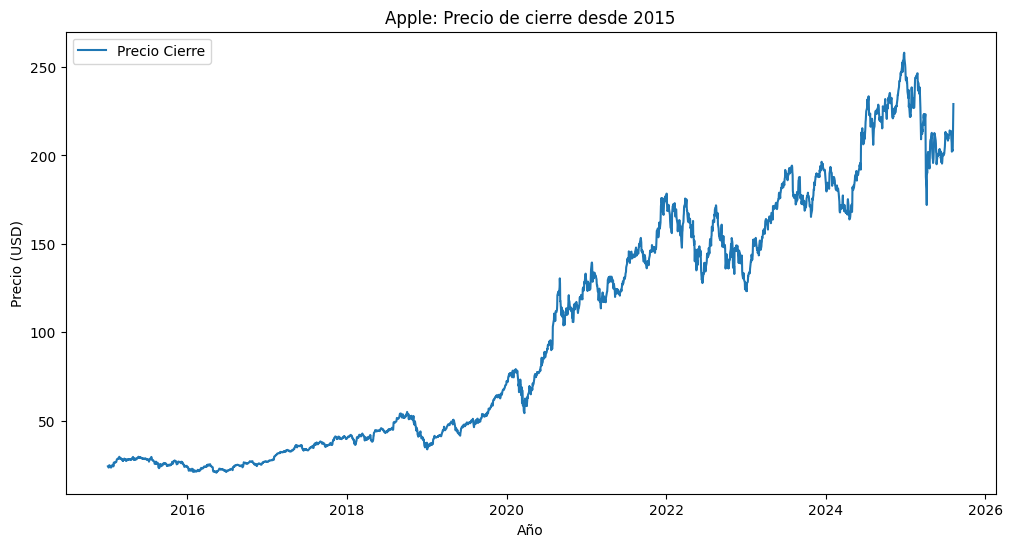

In [630]:
aapl = yf.Ticker("AAPL")
hist = aapl.history(start="2015-01-01", end="2025-08-11")

plt.figure(figsize=(12,6))
plt.plot(hist.index, hist["Close"], label="Precio Cierre")
plt.title("Apple: Precio de cierre desde 2015")
plt.xlabel("Año")
plt.ylabel("Precio (USD)")
plt.legend()
plt.savefig("Apple.png", dpi=300, bbox_inches="tight")
plt.show()

Extraigo las métricas consultando MacroTrends.

In [632]:
aapl_earnings = (-0.1 - 0.122608) / 0.652023

In [633]:
aapl_eps = (8.4 - 11.052718) / 27.201145

In [634]:
aapl_roe = (0.3789 - 0.233855) / 0.397237	

In [635]:
aapl_roa = (0.1601 - 0.068162) / 0.056932	

In [636]:
aapl_current = (1.28 - 1.636598) / 1.567591

In [637]:
aapl_debt = (142 - 123.138613) / 177.823101

In [638]:
aapl_peg = (1.021 - 2.509571) / 2.208128	

In [639]:
aapl_score = (
    0.25 * aapl_earnings +
    0.15 * aapl_eps +
    0.20 * aapl_roe +
    0.10 * aapl_roa +
    0.12 * aapl_current +
    0.08 * aapl_debt +
    0.10 * aapl_peg
)
aapl_score

0.048307581258777876

- Esto muestra que el score que utilizamos no está optimizado para value investing.
- No captura casos de empresas con múltiplos bajos, estabilidad y potencial a largo plazo, pero bajo crecimiento presente.

In [641]:
aapl_value = (
    0.10 * aapl_earnings +   # antes 0.25
    0.05 * aapl_eps +       # antes 0.15
    0.25 * aapl_roe +   # antes 0.20
    0.20 * aapl_roa +   # antes 0.10
    0.20 * aapl_current +     # antes 0.12
    0.15 * aapl_debt +     # antes 0.08
    0.05 * aapl_peg   # antes 0.10
)
aapl_value

0.31194850688223535

- Priorizando la solidez financiera (efectivo y debt/equity), por encima del crecimiento, tenemos un puntaje mucho mejor.
- Utilizando otras variables del dataset se podría armar un score orientado al value investing:
1) PE Ratio en vez de peg, así sacamos el crecimiento de la ecuación
2) Incluir el Price to Book podría ser una buena idea para ponderar múltiplos bajos de esta métrica
3) El dividend yield podría ser parte de este hipotético score

In [643]:
df_std["Score_value"] = (
    0.25 * df_std["dividendYield"] +
    0.25 * df_std["returnOnEquity"] +
    0.20 * df_std["returnOnAssets"] +
    0.15 * df_std["priceToBook"] +
    0.15 * df_std["trailingPE"] 
)
df_std = df_std.sort_values("Score_value", ascending=False)
df_std.head(20)

,Ticker,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,beta,profitMargins,returnOnEquity,debtToEquity,currentRatio,earningsGrowth,trailingPegRatio,returnOnAssets,epsForward,sector,Score,Score_value
220,HD,0.653028,0.192979,-0.009407,-2.427082,0.353359,0.003527,-0.362243,6.958425,-3.690794,-0.347125,-0.264995,-0.837136,1.460383,0.167342,Consumer Cyclical,1.075944,1.784907
19,MO,-0.043971,0.441281,-0.564632,2.317708,2.782860,-0.887654,2.170869,-0.207126,0.276469,-0.797317,-0.743992,0.210877,2.843430,-0.209863,Consumer Defensive,-0.027032,1.626468
108,CL,-0.138740,0.214281,-0.090840,-11.062818,0.324158,-1.480992,0.045394,10.782195,-5.657230,-0.504214,-0.151387,0.293384,1.618802,-0.264696,Consumer Defensive,1.757023,1.473068
328,NVDA,11.291611,-0.432652,0.908691,-2.796233,-1.077478,2.646581,2.783799,2.320307,0.624127,1.118392,0.221678,0.349733,8.163393,-0.255127,Technology,1.516662,1.459053
447,VRSN,-0.253867,0.061132,0.328064,1.134621,-0.417541,-0.526491,2.660860,-0.207126,0.276469,-0.698977,-0.036243,0.143013,6.987998,-0.088421,Technology,0.587592,1.420796
260,KMB,-0.209858,0.344334,-0.341320,-1.921534,1.258582,-1.497409,-0.104579,4.628505,-2.656791,-0.557853,-0.357110,-1.357517,0.831102,-0.125958,Consumer Defensive,0.485403,1.401412
441,UPS,-0.126420,0.425134,-0.647297,0.090119,3.302633,0.430356,-0.556633,0.290337,-0.338299,-0.199616,-0.315658,0.558084,0.036017,-0.082533,Industrials,-0.024835,0.982734
282,LYB,-0.270762,0.287344,-0.788015,0.278534,4.348020,-0.383433,-0.826452,-0.401893,0.108395,0.121585,-1.150832,0.729263,-0.521702,-0.089893,Basic Materials,-0.337553,0.967073
290,MCD,0.251572,0.162597,0.002935,4.158094,0.271597,-1.115139,1.314713,-0.207126,0.276469,-0.290931,-0.223543,-0.087280,1.160424,0.057309,Consumer Cyclical,0.005805,0.896306
143,DPZ,-0.278264,0.154073,0.118670,0.622176,-0.236496,0.212251,-0.104063,-0.207126,0.276469,-0.663856,0.273876,-0.128261,4.247575,0.242415,Consumer Cyclical,0.417792,0.855047


- Verisign (VRSN), una de las compras más recientes de Warren Buffett, está en el top 5. Esto una buena señal de que Score_value representa esta filosofía de inversión.
- Es importante considerar que **df_std** está estandarizado a partir de valores de 2025. Calcular el score de la inversión de Warren Buffett en 2016 no contemplaría la realidad del mercado en esas épocas.

# B) Compra de Nvidia en 2017 y en 2023

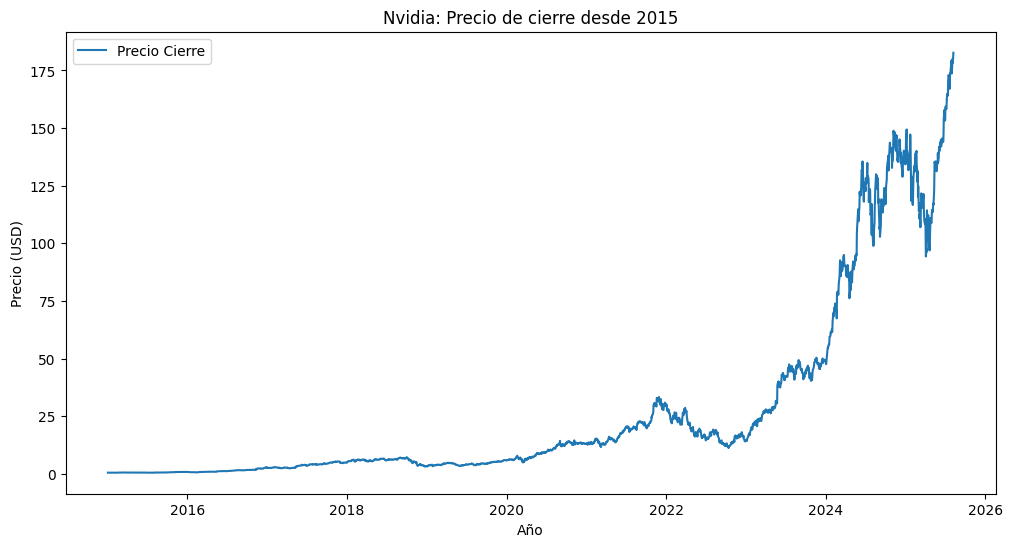

In [646]:
nvda = yf.Ticker("NVDA")
hist_nvda = nvda.history(start="2015-01-01", end="2025-08-11")

plt.figure(figsize=(12,6))
plt.plot(hist_nvda.index, hist_nvda["Close"], label="Precio Cierre")
plt.title("Nvidia: Precio de cierre desde 2015")
plt.xlabel("Año")
plt.ylabel("Precio (USD)")
plt.legend()
plt.savefig("Nvidia.png", dpi=300, bbox_inches="tight")
plt.show()

In [647]:
nvda_earnings = (1.67 - 0.122608) / 0.652023
nvda_eps = (0.08 - 11.052718) / 27.201145
nvda_roe = (0.3372 - 0.233855) / 0.397237	
nvda_roa = (0.1959 - 0.068162) / 0.056932	
nvda_current = (4.77 - 1.636598) / 1.567591
nvda_debt = (71 - 123.138613) / 177.823101
nvda_peg = (0.71 - 2.509571) / 2.208128	

In [648]:
nvda_score = (
    0.25 * nvda_earnings +
    0.15 * nvda_eps +
    0.20 * nvda_roe +
    0.10 * nvda_roa +
    0.12 * nvda_current +
    0.08 * nvda_debt +
    0.10 * nvda_peg
)
nvda_score

0.9441065510553824

- Pareciera el score no valorizar como corresponde a Nvidia, podría ser debido a que estandarizamos con medias y desvíos de 2025. Me interesa ver que surge con valores de 2023. 

In [650]:
nvda1_earnings = (1 - 0.122608) / 0.652023
nvda1_eps = (0.39 - 11.052718) / 27.201145
nvda1_roe = (0.2088 - 0.233855) / 0.397237	
nvda1_roa = (0.113 - 0.068162) / 0.056932	
nvda1_current = (3.43 - 1.636598) / 1.567591
nvda1_debt = (81 - 123.138613) / 177.823101
nvda1_peg = (0.5 - 2.509571) / 2.208128	

In [651]:
nvda1_score = (
    0.25 * nvda1_earnings +
    0.15 * nvda1_eps +
    0.20 * nvda1_roe +
    0.10 * nvda1_roa +
    0.12 * nvda1_current +
    0.08 * nvda1_debt +
    0.10 * nvda1_peg
)
nvda1_score

0.3710751619784479

- Los bajos puntajes de Nvidia sugieren que el score no califica bien a los valores de una empresa en momentos del pasado.

# C) Compra de Microsoft (MSFT) en 2025 (post caída del mercado por aranceles)

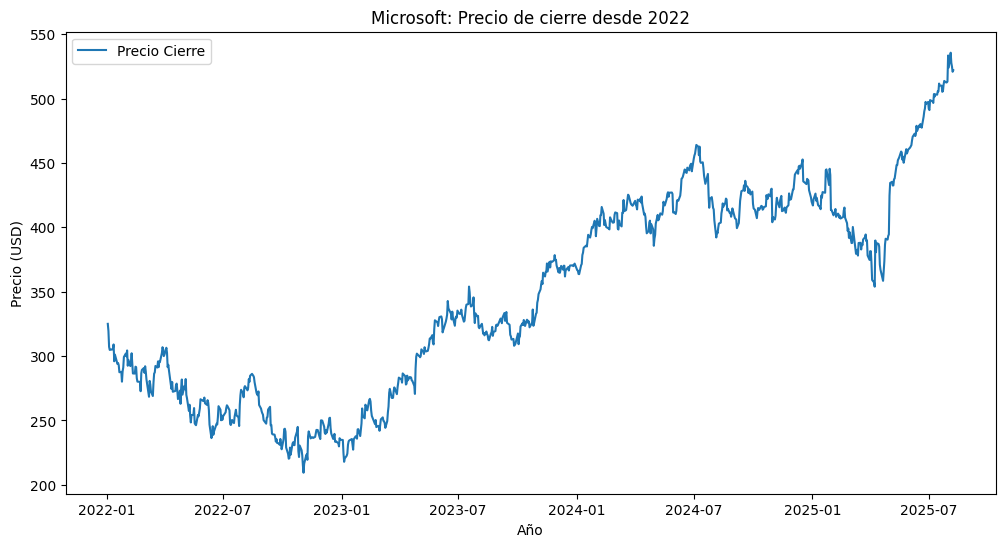

In [654]:
msft = yf.Ticker("MSFT")
hist_msft = msft.history(start="2022-01-01", end="2025-08-11")

plt.figure(figsize=(12,6))
plt.plot(hist_msft.index, hist_msft["Close"], label="Precio Cierre")
plt.title("Microsoft: Precio de cierre desde 2022")
plt.xlabel("Año")
plt.ylabel("Precio (USD)")
plt.legend()
plt.savefig("Microsoft.png", dpi=300, bbox_inches="tight")
plt.show()

In [655]:
msft_earnings = (0.15514 - 0.122608) / 0.652023
msft_eps = (13.7 - 11.052718) / 27.201145
msft_roe = (0.3274 - 0.233855) / 0.397237	
msft_roa = (0.1813 - 0.068162) / 0.056932	
msft_current = (1.37 - 1.636598) / 1.567591
msft_debt = (75 - 123.138613) / 177.823101
msft_peg = (2.3 - 2.509571) / 2.208128	

In [656]:
msft_score = (
    0.25 * msft_earnings +
    0.15 * msft_eps +
    0.20 * msft_roe +
    0.10 * msft_roa +
    0.12 * msft_current +
    0.08 * msft_debt +
    0.10 * msft_peg
)
msft_score

0.22133850010731035

In [657]:
df_std[df_std["Ticker"] == "MSFT"]["Score"]

299    0.256203
Name: Score, dtype: float64

- Notemos que el score post-rally de Microsoft es mayor al score pre-rally. Lo lógico es que sea al reves, es mejor haber invertido en microsoft antes que ahora.

#### El score depende de la estandarización contemporánea. Al evaluar datos de fechas pasadas con el escalado actual, aparecen distorsiones incluso a 1–3 meses.